In [1]:
%config Completer.use_jedi = False # To make auto-complete faster

#Reloads imported files automatically
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../utils')

In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from matplotlib import colormaps as mplcmaps
import matplotlib.cm as cm

from matplotlib_param_funcs import set_matplotlib_params,reset_rcParams
set_matplotlib_params()

In [3]:
import compute_variables as CV
import miscellaneous_functions as MF
import plotting_helpers as PH
import mixed_plots as MP
import map_functions as mapf
import variable_values_and_errors as val_err
import load_sim
import load_data

In [5]:
# degree_symbol = '°'
degree_symbol = '^\circ'

cmap = mplcmaps['coolwarm']
red = cmap(0.95)
blue = cmap(0.05)
green = 'darkgreen'
grey = 'lightgrey'

plt.rcParams['font.size'] = 20

In [6]:
general_path = '/Users/luismi/Desktop/MRes_UCLan/'

# Load

## Sim

In [7]:
#To play just in case
dummy_df = pd.DataFrame([[1,2,3],[2,3,1],[6,3,4]], columns=['a','b','c'])

In [8]:
sim_choice = "708main" #stuart

rot_angle = 27
axisymmetric = False
zabs = True
GSR=True
R0=8.1
pos_scaling = 1.7

In [9]:
sim_path = general_path + f"708main_simulation/numpy_arrays/R0_{R0}/"

In [10]:
load_chunk = False

if not load_chunk:
     df0 = load_sim.load_simulation(path=sim_path, choice=sim_choice, rot_angle=rot_angle, axisymmetric=axisymmetric, zabs=zabs, pos_factor=pos_scaling,GSR=GSR,R0=R0)
else:
    if sim_choice == "708main" and rot_angle == 27 and not axisymmetric and zabs and pos_scaling == 1.7:
        pickle_name = "df_bulge_zabs.pkl"
        df0 = pd.read_pickle("708main_simulation/"+pickle_name)

708MWout_bar27_scale1.7_8.1R0.npy loaded successfully.


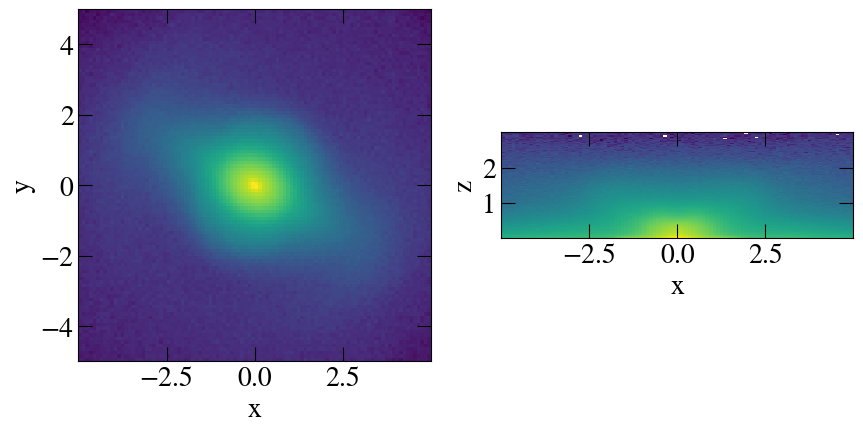

In [11]:
MP.quick_show_xy_xz(df0)

## Data

In [13]:
data_path = general_path+'Observational_data/'
obs_errors = False

In [14]:
data = load_data.load_and_process_data(data_path = data_path, error_bool = obs_errors, zabs = True)

Working with zabs == True; GSR == True.
Found 13031 total stars.
Removed 2545 bad indices.
10486 stars left.


# Visualise

In [12]:
sim_bool = True
# sim_bool = False

# data_bool = True
data_bool = False

In [16]:
bulge_bool = True
# bulge_bool = False

if bulge_bool:
    lmin = -15
    lmax = 15
    bmin = 0
    bmax = 15
    dmin = 5
    dmax = 11
    
else:
    lmin = -10
    lmax = 10
    bmin = 3
    bmax = 10
    dmin = 6
    dmax = 10
    
    spatial_string = fr"$|l|<{lmax}^\circ$"+'\n'+fr"${bmin}<|b|<{bmax}^\circ$"
    
spatial_cut_str = f"{dmin}d{dmax}_l{lmax}_b{bmax}"
print(spatial_cut_str)

5d11_l15_b15


In [17]:
young_min = 4
young_max = 7

old_min = 9.5

In [30]:
# Spatial and population cuts

if sim_bool:
    df_bulge = df0[(df0['d']<dmax)&(df0['d']>dmin)&(df0['l']>lmin)&(df0['l']<lmax)&(df0['b']>bmin)&(df0['b']<bmax)]
    df_bulge_old = df_bulge[df_bulge['age']>old_min]
    df_bulge_young = df_bulge[(df_bulge['age']>young_min)&(df_bulge['age']<young_max)]   
if data_bool:
    
    metal_cut = -0.2
    
    data_bulge = data[(data['d']<dmax)&(data['d']>dmin)&(data['l']>lmin)&(data['l']<lmax)&(data['b']>bmin)&(data['b']<bmax)]
    data_bulge_rich = data_bulge[data_bulge['FeH']>metal_cut]
    data_bulge_poor = data_bulge[data_bulge['FeH']<metal_cut]

## Distance comparison

In [92]:
if not (sim_bool and data_bool):
    raise ValueError("You need both sim and data for the distance comparison")

In [93]:
sim_whole = False
data_whole = True
# data_whole = False

sim_bins = 80
data_bins = 20

lw=1.5; sim_color = 'orange'; apogee_color='k'
log_bool = False

In [94]:
# Obtain histograms

fig,ax = plt.subplots()

if sim_whole:
    h_sim = ax.hist(df_bulge.d,bins=sim_bins,histtype='step',lw=lw,edgecolor='k',color=sim_color,density=True,alpha=1,label='Simulation',log=log_bool)
else:
    h_y=ax.hist(df_bulge_young.d,bins=sim_bins,histtype='step',lw=lw,edgecolor='blue',color=sim_color,density=True,label='Young',log=log_bool)
    h_o=ax.hist(df_bulge_old.d,bins=sim_bins,histtype='step',lw=lw,edgecolor='red',color=sim_color,density=True,label='Old',log=log_bool)

if data_whole:
    h_a = ax.hist(data_bulge.d,bins=data_bins,histtype='step',lw=lw,edgecolor='black',color=apogee_color,density=True,label='APOGEE',log=log_bool)
else:
    h_r=ax.hist(data_bulge_rich.d,bins=data_bins,histtype='step',lw=lw,linestyle='--',edgecolor='blue',color=apogee_color,density=True,alpha=1,label='Rich',log=log_bool)
    h_p=ax.hist(data_bulge_poor.d,bins=data_bins,histtype='step',lw=lw,linestyle='--',edgecolor='red',color=apogee_color,density=True,alpha=1,label='Poor',log=log_bool)
# plt.ylim(ymin=0);plt.xlim(6,10)
plt.close()

In [95]:
save_bool = True
# save_bool = False
save_format = '.png'

save_path = general_path +'708main_simulation/graphs/Observations/Apogee/distance_comparison/'

if save_bool: # filename
    filename = 'd_comparison_1b5'
    
    if sim_whole and data_whole:
        filename += '_whole'
    elif sim_whole:
        filename += '_simwhole'
    elif data_whole:
        filename += '_datawhole'
    
    filename += save_format
    
    print(filename)

d_comparison_1b5_datawhole.png


In [96]:
data_bulge.d.mean(),data_bulge.d.median()

(7.980482659081344, 7.95435)

Saved:C:/Users/Luismi/JUPYTER_NOTEBOOKS/MRes_UCLan/708main_simulation/graphs/Observations/Apogee/distance_comparison/d_comparison_1b5_datawhole.png


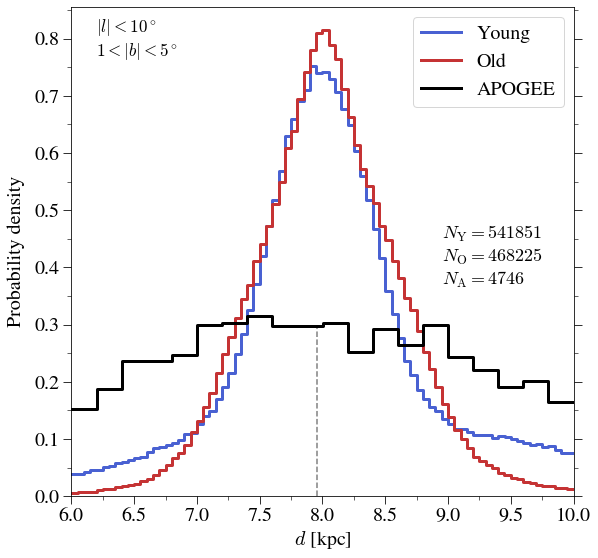

In [97]:
fig,ax = plt.subplots()

if True: # Get values from hist
    if sim_whole:
        x_sim,y_sim = MF.get_plot_values_from_hist(h_sim)
    else:
        x_y,y_y = MF.get_plot_values_from_hist(h_y)
        x_o,y_o = MF.get_plot_values_from_hist(h_o)
    if data_whole:
        x_a,y_a = MF.get_plot_values_from_hist(h_a)
    else:
        x_r,y_r = MF.get_plot_values_from_hist(h_r)
        x_p,y_p = MF.get_plot_values_from_hist(h_p)

if True: # Plot
    lw = 3
    
    if sim_whole:
        ax.plot(x_sim,y_sim,color='Orange',label='Sim',drawstyle='steps',lw=lw)
#         ax.vlines(x=df_bulge.d.median(),ymin=0,ymax=h_sim[0][int(len(h_sim[0])/2)-1],color='k',lw=1.5,linestyle='--')
    else:
        ax.plot(x_y,y_y,drawstyle='steps',color=blue,label='Young',lw=lw)
        ax.plot(x_o,y_o,drawstyle='steps',color=red,label='Old',lw=lw)
    if data_whole:
        ax.plot(x_a,y_a,drawstyle='steps',color='k',label='APOGEE',lw=lw)#,linestyle='--')
        ax.vlines(x=data_bulge.d.median(),ymin=0,ymax=y_a[int(len(y_a)/2)],color='grey',lw=1.5,linestyle='--')#,linestyle='dotted')
    else:
        ax.plot(x_r,y_r,drawstyle='steps',color=blue,label='Rich',linestyle='--',lw=lw)
        ax.plot(x_p,y_p,drawstyle='steps',color=red,label='Poor',linestyle='--',lw=lw)

if True: # Axes, text, save
    if log_bool: ax.set_yscale('log')
    else: ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    
    ax.text(x=0.05,y=0.9, s=string, size=17,color='black',transform=ax.transAxes)

    ax.set_xlim(6,10);ax.set_ylim(ymin=0)
    ax.set_xlabel(r"$d$ [kpc]")
    ax.set_ylabel("Probability density",labelpad=10)
    ax.tick_params('x',which='both',direction='out',top=False)
    ax.tick_params('y',which='both',direction='out',right=True)
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    #     number_string = '$N_Y=%i$'%len(df_bulge_young)+'\n'+'$N_O=%i$'%len(df_bulge_old)+'\n\n'+'$N_R=%i$'%len(data_bulge_rich)+'\n'+'$N_P=%i$'%len(data_bulge_poor)
    number_string = '$N_\mathrm{Y}=%i$'%len(df_bulge_young)+'\n'+'$N_\mathrm{O}=%i$'%len(df_bulge_old)+'\n'+'$N_\mathrm{A}=%i$'%len(data_bulge)
    
    y_s = 0.5 if bulge_bool else 0.37
    ax.text(x=8.95,y=y_s,s=number_string,fontsize=18)#,bbox={'color':'whitesmoke','alpha':1,'boxstyle':'round'})
    #     ax.axvline(8,color='k',lw=1,linestyle='--')
    plt.legend(loc='best')
    if save_bool: 
        plt.savefig(save_path+filename,bbox_inches='tight',dpi=250)
        print('Saved:'+save_path+filename)
    plt.show()

In [ ]:
# Old plot 

sim_bins = 60
data_bins = 40

fig, axs = plt.subplots(nrows=2,sharex=True,gridspec_kw={'hspace':0})

sim_color = 'seagreen'
axs[0].hist(df_bulge.d,bins=sim_bins,histtype='bar',lw=0.5,edgecolor='black',color=sim_color)#,log=True)
axs[0].axvline(df_bulge.d.median(),color='red',linestyle='--',lw=3)
# axs[0].axvline(df_bulge.d.mean(),color='red',linestyle='dotted',lw=3)
yticks = [100000,200000,300000]
axs[0].set_yticks(ticks=yticks);axs[0].set_yticklabels(['%.0e'%tick for tick in yticks])

# automatic_y_ticks = axs[0].get_yticks()
# y_ticks = np.linspace(automatic_y_ticks[0],automatic_y_ticks[-1],4)
# axs[0].set_yticks(y_ticks)#[1:])
# axs[0].set_yticklabels(["%.0e"%tick for tick in y_ticks])#[1:]])

apogee_color = 'mediumpurple'
axs[1].hist(data_bulge.d,bins=data_bins,histtype='bar',lw=0.5,edgecolor='black',color=apogee_color)
axs[1].axvline(data_bulge.d.median(),color='red',linestyle='--',lw=3)
# axs[1].axvline(data_bulge.d.mean(),color='red',linestyle='dotted',lw=3)

axs[0].text(x=9.2,y=300000, s="Simulation", size=20,color='green')
axs[1].text(x=9.2,y=210, s="APOGEE", size=20,color='purple')

#units of l and b use \hspace{0.1}[^\circ]
string = fr"$|l|,|b|<10^\circ$"
axs[0].text(x=6.2,y=300000, s=string, size=17,color='black')

fig.align_ylabels(axs)

for ax in axs:
    ax.set_xlim(6,10)
    ax.set_xlabel(r"$d$ [kpc]",fontsize=25)
    ax.set_ylabel(r"$N$",rotation=0,labelpad=30,fontsize=25)
    ax.tick_params('x',which='both',labelsize=25,direction='out',top=False)
    ax.tick_params('y',which='both',labelsize=25,direction='out',right=False)
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax.axvline(8,color='k',lw=3)
    
# plt.savefig(save_path+'distance_sim_apogee_comparison_median.png',bbox_inches='tight',dpi=200)
plt.show()

## bz-cumulative

In [372]:
alpha = 0.9
var = 'b'

save_path = general_path +'708main_simulation/graphs/other_plots/bz_cumulative/'

### Individual

In [125]:
plot_sim = True
# plot_sim = False

In [126]:
bins = 5*10*100

if plot_sim:
    print("Plotting sim")
    df1 = df_bulge_young
    df2 = df_bulge_old
    
    label1 = 'Young'
    label2 = 'Old'
    
    nstring1 = 'Y'
    nstring2 = 'O'
else:
    print("Plotting data")
    df1 = data_bulge_rich
    df2 = data_bulge_poor
    
    label1 = 'Rich'
    label2 = 'Old'
    
    nstring1 = 'R'
    nstring2 = 'P'

h1=plt.hist(df1[var],bins=bins,density=True,cumulative=True,color='blue')
h2=plt.hist(df2[var],bins=bins,density=True,cumulative=True,color='red')
plt.close()

In [128]:
save_bool = True
save_format = '.png'

if True: # filename
    filename = f'{var}_cumulative'
    
    if plot_sim:
        filename += '_sim'
    else:
        filename += '_data'
    
    print(filename)
    
    filename += save_format

b_cumulative_data


Saved:C:/Users/Luismi/JUPYTER_NOTEBOOKS/MRes_UCLan/708main_simulation/graphs/other_plots/bz_cumulative/b_cumulative_data.png


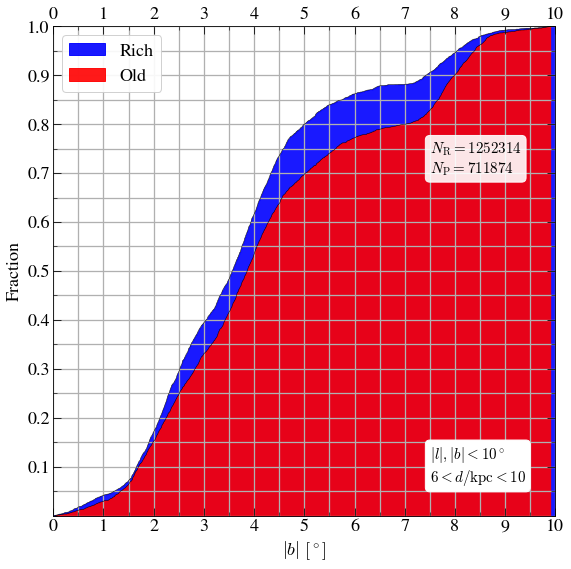

In [129]:
if True: # Plot
    fig,ax=plt.subplots()
    
    #ax.axvline(x=2,color='red');ax.axvline(x=4,color='red')
    #ax.axvline(x=2,color='red');ax.axvline(x=4,color='red')

    x1,y1 = MF.get_plot_values_from_hist(h1)
    x2,y2 = MF.get_plot_values_from_hist(h2)

    ax.plot(x1,y1,color='black',lw=0.5)
    ax.plot(x2,y2,color='black',lw=0.5)
    ax.fill_between(x=x1,y1=0,y2=y1,color='blue',label=label1,alpha=alpha)
    ax.fill_between(x=x2,y1=0,y2=y2,color='red',label=label2,alpha=alpha)
if True: # Axes, text, save
    
    if var == 'z':
        ax.set_xlabel(r'$|z|$ [kpc]');ax.set_ylabel('Fraction');ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1));ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5));ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
        ax.text(x=1.3,y=0.06,s=r"$|l|,|b|<10^\circ$"+"\n"+r"$6<d/\mathrm{kpc}<10$",fontsize=15,bbox={'color':'white','alpha':0.9})
        ax.text(x=1.3,y=0.7,s='$N_\mathrm{%s}=%i$'%(nstring1,len(df_bulge_young))+'\n'+'$N_\mathrm{%s}=%i$'%(nstring2,len(df_bulge_old)),fontsize=15,bbox={'color':'white','alpha':0.9,'boxstyle':'round'})
    else:
        ax.set_xlabel(r'$|b|$ $[^\circ]$');ax.set_ylabel('Fraction');ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1));ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1));ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
        ax.text(x=7.5,y=0.07,s=r"$|l|,|b|<10^\circ$"+"\n"+r"$6<d/\mathrm{kpc}<10$",fontsize=15,bbox={'color':'white','alpha':1,'boxstyle':'round'})
        ax.text(x=7.5,y=0.7,s='$N_\mathrm{%s}=%i$'%(nstring1,len(df_bulge_young))+'\n'+'$N_\mathrm{%s}=%i$'%(nstring2,len(df_bulge_old)),fontsize=15,bbox={'color':'white','alpha':0.9,'boxstyle':'round'})
    
    plt.grid(axis='both',which='both',lw=1.3)
    ax.tick_params(labeltop=True);ax.set_yticks(ax.get_yticks()[2:]);ax.set_ylim(0,1);ax.set_xlim(0,np.max([h1[1],h2[1]]) if var=='z' else 10)
    plt.legend(loc='best',framealpha=0.9)
    
    if save_bool: 
        plt.savefig(save_path+filename,dpi=250,bbox_inches='tight')
        print('Saved:'+save_path+filename)
    plt.show()

### Both

In [373]:
if not (sim_bool and data_bool):
    raise ValueError("You need both sim and data for the distance comparison")

In [374]:
bins = 5*10*100

h_y=plt.hist(df_bulge_young[var],bins=bins,density=True,cumulative=True,color='blue',histtype='step',alpha=alpha)
h_o=plt.hist(df_bulge_old[var],bins=bins,density=True,cumulative=True,color='red',histtype='step',alpha=alpha)
h_r=plt.hist(data_bulge_rich[var],bins=bins,density=True,cumulative=True,color='blue',histtype='step',alpha=alpha)
h_p=plt.hist(data_bulge_poor[var],bins=bins,density=True,cumulative=True,color='red',histtype='step',alpha=alpha)
plt.close()

In [375]:
save_bool = True
# save_bool = False

filename = f'{var}_cumulative_datasim'+'.png'

C:/Users/Luismi/JUPYTER_NOTEBOOKS/MRes_UCLan/708main_simulation/graphs/other_plots/bz_cumulative/b_cumulative_datasim.png


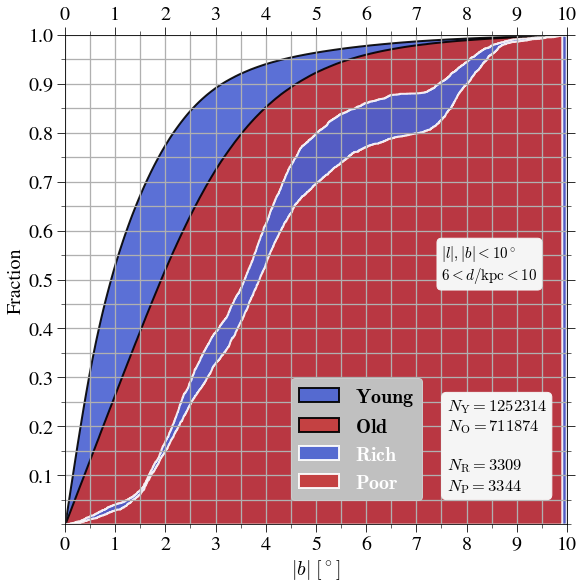

In [377]:
if True: # Plot
    fig,ax=plt.subplots()

    pop_labels = ["$\\bf{Young}$","$\\bf{Old}$","$\\bf{Rich}$","$\\bf{Poor}$"]
    line_colors = ['k','k','w','w']
    for h,label,edge_color,color,alfa in zip([h_y,h_o,h_r,h_p],pop_labels,line_colors,[blue,red,blue,red],[alpha]*4):
    #     ax.plot(h[1][1:],h[0],color='k',lw=1)#,linestyle=style)#,label=label)
        x,y = MF.get_plot_values_from_hist(h)
        ax.fill_between(x=x,y1=0,y2=y,facecolor=color,edgecolor=edge_color,lw=2,alpha=alfa,label=label)#,hatch='.')#,linestyle=style)
    
if True: #Axes, text, save
    number_string = '$N_\mathrm{Y}=%i$'%len(df_bulge_young)+'\n'+'$N_\mathrm{O}=%i$'%len(df_bulge_old)+'\n\n'+'$N_\mathrm{R}=%i$'%len(data_bulge_rich)+'\n'+'$N_\mathrm{P}=%i$'%len(data_bulge_poor)
    
    if var == 'z':
        ax.set_xlabel(r'$|z|$ [kpc]');ax.set_ylabel('Fraction');ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1));ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5));ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
        ax.text(x=1.3,y=0.06,s=r"$|l|,|b|<10^\circ$"+"\n"+r"$6<d/\mathrm{kpc}<10$",fontsize=15,bbox={'color':'white','alpha':0.9})
        ax.text(x=1.3,y=0.7,s=number_string,fontsize=15,bbox={'color':'whitesmoke','alpha':1,'boxstyle':'round'})
    else:
        ax.set_xlabel(r'$|b|$ $[^\circ]$');ax.set_ylabel('Fraction');ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1));ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1));ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
        ax.text(x=7.5,y=0.5,s=r"$|l|,|b|<10^\circ$"+"\n"+r"$6<d/\mathrm{kpc}<10$",fontsize=15,bbox={'color':'whitesmoke','alpha':1,'boxstyle':'round'})
        ax.text(x=7.6,y=0.07,s=number_string,fontsize=16.43,bbox={'color':'whitesmoke','alpha':1,'boxstyle':'round'})
    plt.grid(axis='both',which='both',lw=1.3)
    ax.tick_params(labeltop=True);ax.set_yticks(ax.get_yticks()[2:]);ax.set_ylim(0,1);ax.set_xlim(0,np.max([h1[1],h2[1]]) if var=='z' else 10)
    plt.legend(loc=[0.45,0.05],framealpha=1,facecolor='silver',labelcolor=['k','k','w','w'])
    if save_bool: 
        plt.savefig(save_path+filename,dpi=250,bbox_inches='tight')
        print(save_path+filename)
    plt.show()

## Pop cumulative

In [23]:
save_path = general_path +'graphs/other_plots/pop_cumulative/'

In [25]:
plot_sim = True
# plot_sim = False

In [31]:
bins = 5*10*100

grid = True
pop_cut = False

if plot_sim:
    print("Plotting sim")
    
    var = 'age'
    
    lim2_right = 10
    
    if pop_cut:
        min_val = 9
        var_vals = df_bulge[df_bulge[var]>min_val][var]
        
        lim1_left = min_val
        lim1_right = 9.9
        lim2_left = 9.9
        
        label1 = fr'${lim1_left}<$Age/Gyr$<{lim1_right}$'
        label2 = fr'Age$>{lim2_left}$ Gyr'
        
    else:
        var_vals = df_bulge[var]
        
        lim1_left = young_min
        lim1_right = young_max

        lim2_left = old_min
    
        label1 = 'Young'
        label2 = 'Old'
    
    xlabel = 'Age [Gyr]'
    
    xticks = np.arange(0,11)
    
else:
    print("Plotting data")
    
    var = 'FeH'
    var_vals = data_bulge[var]
    
    metal_cut = -0.2
    
    lim1_left = metal_cut
    lim1_right = np.inf
    
    lim2_left = -np.inf
    lim2_right = metal_cut
    
    label1 = 'Rich'
    label2 = 'Old'
    
    xlabel = 'Metallicity [dex]'
    
    xticks = np.arange(-2,1.5,0.5)

Plotting sim


In [32]:
h=plt.hist(var_vals,bins=bins,density=True,cumulative=True)
plt.close()

In [121]:
plt.rcParams.update({'font.size' : 25})

In [33]:
if True: # filename
    filename = f'{var}_cumulative'
    
    if plot_sim:
        filename += '_sim'
    else:
        filename += '_data'
        
    filename += f"_{spatial_cut_str}"
    
    filename += '_grid' if grid else ''
    
    filename += '_specialCut' if pop_cut else ''
    
    print(filename)

age_cumulative_sim_5d11_l15_b15_grid


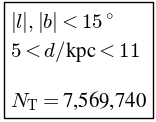

In [107]:
if True: # text_string

    if abs(lmin) == abs(lmax) and bmin == 0 and lmax == bmax:
        spatial_string = fr"$|l|,|b|<{lmax}^\circ$"
        spatial_string += "\n" + fr"${dmin}<d/$kpc$<{dmax}$"
    
    number_string = r"$N_\mathrm{T}=$"+MF.format_number_with_commas(len(df_bulge))
    
    text_string = spatial_string + "\n\n" + number_string
    
    if True: # show
        fig,ax=plt.subplots(figsize=(0.00001,0.00001))
        ax.text(x=0.5,y=0.5,s=text_string,size=15,bbox={'facecolor':'w',"alpha":1})
        ax.set_xticks([]);ax.set_yticks([])
        plt.show()

In [123]:
save_bool = True
# save_bool = False

age_cumulative_sim_5d11_l15_b15_grid
Saved: .png
Saved: .pdf


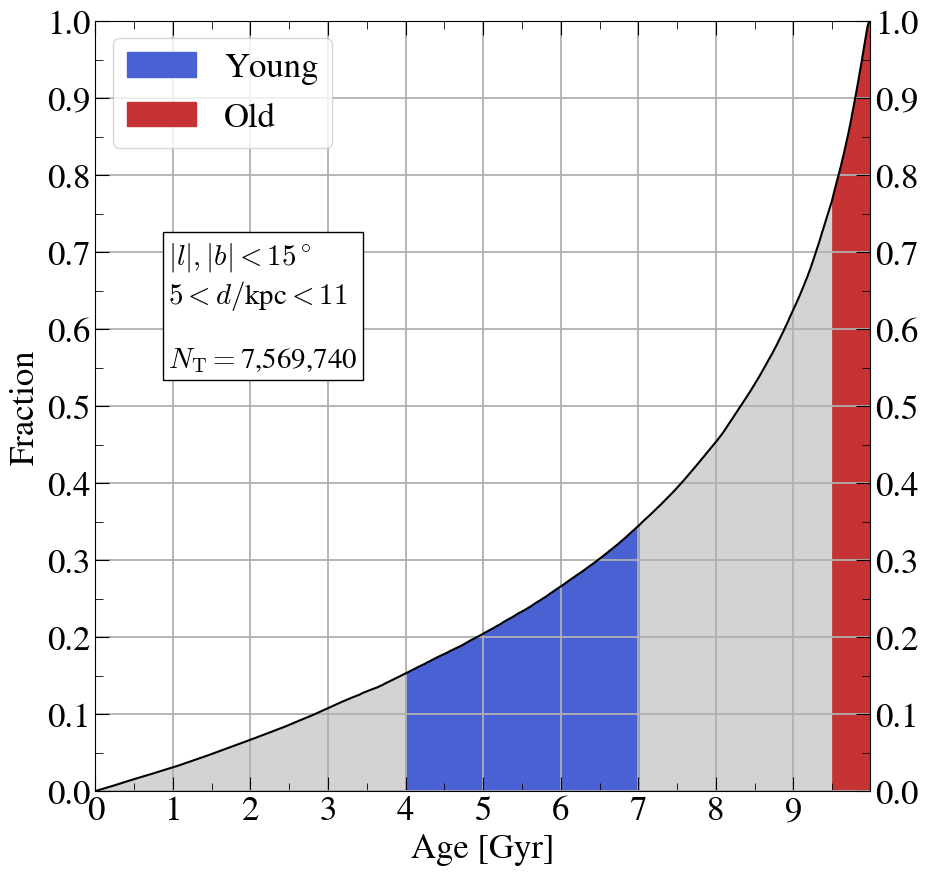

In [124]:
if True: # Plot
    fig,ax=plt.subplots(figsize=(10,10))

    x,y = MF.get_plot_values_from_hist(h)
    ax.plot(x,y,color='k')
    ax.fill_between(x=x,y1=0,y2=y,color=grey)

    # young / rich
    x1,y1 = x[(x>lim1_left)&(x<lim1_right)], y[(x>lim1_left)&(x<lim1_right)]
    ax.fill_between(x=x1,y1=0,y2=y1,color=blue,label=label1)

    # old / poor
    x2,y2 = x[(x>lim2_left)&(x<lim2_right)], y[(x>lim2_left)&(x<lim2_right)]
    ax.fill_between(x=x2,y1=0,y2=y2,color=red,label=label2)

if True: # Axes, text, save

    ax.set_yticks(np.arange(0,1+0.1,0.1))
    
    if not pop_cut:
        if np.max(xticks) > np.max(var_vals):
            ax.set_xlim(np.min(var_vals),np.max(var_vals))
            ax.set_xticks(xticks[:-1])
        else:
            ax.set_xticks(xticks)
            ax.set_xlim(np.min(var_vals),np.max(var_vals))
    else:
        ax.set_xlim(min_val,10)
        
        number_string = r'$N(\mathrm{Age>%i})\approx%.2f N_\mathrm{T}$'%(min_val,len(var_vals)/len(df_bulge))
        ax.text(x=0.05,y=0.6,s=number_string,transform=ax.transAxes,bbox={'facecolor':'w'})
    
    ax.set_ylim(0,1)
    
    if grid:
#         plt.grid(axis='y',which='both',lw=1.3)
        plt.grid(axis='both',which='major',lw=1.3)
    
    ax.tick_params(which='both',top=True)
    ax.tick_params(which='both',labelright=True)
    
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    
    ax.set_ylabel('Fraction')
    ax.set_xlabel(xlabel)
        
    ax.text(x=0.94,y=0.55,s=text_string,fontsize="small",bbox={'facecolor':'w',"alpha":1})
    
    plt.legend(loc='best')
    
    print(filename)
    if save_bool:
        for file_format in [".png",".pdf"]:
            plt.savefig(save_path+filename+file_format,bbox_inches='tight',dpi=200)
            print("Saved:",file_format)
    plt.show()

### Compute fractions

In [136]:
for pop in [df_bulge,df_bulge_old,df_bulge_young]: # double check
    assert pop["b"].min() >= bmin and pop["b"].max() <= bmax
    assert pop["l"].min() >= lmin and pop["l"].max() <= lmax
    assert pop["d"].min() >= dmin and pop["d"].max() <= dmax

In [138]:
total = len(df_bulge)
young = len(df_bulge_young)
old = len(df_bulge_old)

print("Total: ",total)
print("Young: ",young, MF.return_int_or_dec(young/total*100))
print("Old: ",old,MF.return_int_or_dec(old/total*100))

Total:  7569740
Young:  1449899 19.2
Old:  1755170 23.2


## GMM
https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html

In [14]:
from sklearn.mixture import GaussianMixture

In [15]:
save_path = general_path + "708main_simulation/graphs/Observations/Apogee/Metallicity/"

In [18]:
# cuts = 'bulgeHigh'
cuts = 'bulge'
# cuts = 'total'

number_of_gaussians = 3

if cuts == 'total':
    metallicity = data['FeH']
elif cuts == 'bulge':
    metallicity = data_bulge['FeH']
elif cuts == 'bulgeHigh':
    bmin = 1.5
    
    metallicity = data_bulge[data_bulge['b']>bmin]['FeH']

In [19]:
# Perform fit

X = np.array(metallicity).reshape(-1,1)
model = GaussianMixture(number_of_gaussians).fit(X)

n_datapoints = 1000
x = np.linspace(X.min(), X.max()+0.1, n_datapoints)
logprob = model.score_samples(x.reshape(-1,1))
responsibilities = model.predict_proba(x.reshape(-1,1))

pdf = np.exp(logprob)
# pdf_individual = responsibilities * pdf[:, np.newaxis]

In [20]:
fwhm = False
standard_dev = False
decimal = 2

colors_dict = {
    2: ['r','b'],
    3: ['r','g','b'],
    5: ['cyan','orangered','red','green','blue']
}
colors = colors_dict[number_of_gaussians]

In [21]:
# save_bool = True
save_bool = False

save_format = '.png'

if True: # filename
    filename = f"gmm_{number_of_gaussians}comp"
    
    if cuts == 'bulgeHigh':
        filename += "_bulge%.1fb"%bmin
    else:
        filename += f"_{cuts}"
    
    filename += f"_{decimal}dec"
    
    if fwhm:
        filename += '_fwhm'
    if standard_dev:
        filename += '_std'
    
    filename += save_format
    print(filename)

gmm_3comp_bulge_2dec.png


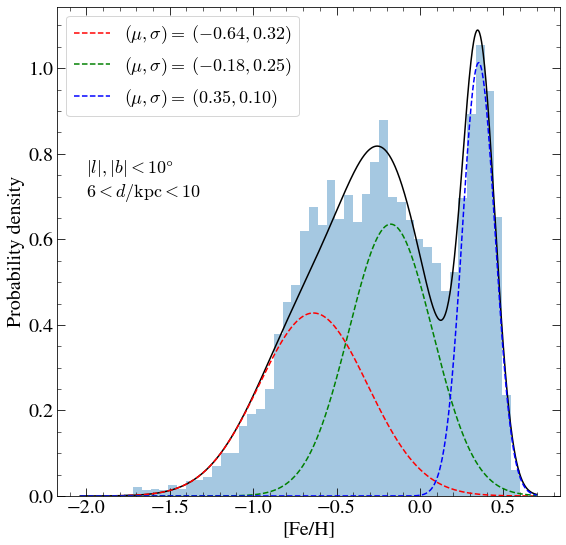

In [22]:
bins = 50
alpha = 0.4

if True: # Plot

    fig, ax = plt.subplots()

    ax.hist(X, 50, density = True, histtype='stepfilled', alpha=0.4)
    ax.plot(x,pdf,'-k')
    
    if fwhm and standard_dev: raise ValueError("Both fwhm and standard_dev are True")
    
    gauss_list = []
    for i in range(number_of_gaussians):
        gauss_list.append(pdf_individual[:,i])
    
    mean_list,sigma_list = [],[]
    for i in range(number_of_gaussians):
        mean, sigma = MF.get_mean_and_std(x, gauss_list[i])
        mean_list.append(mean),sigma_list.append(sigma)
    
    mean_array,sigma_array,gauss_array = np.array(mean_list),np.array(sigma_list),np.array(gauss_list)
    sorting_index = mean_array.argsort()
    mean_array = mean_array[sorting_index]
    sigma_array = sigma_array[sorting_index]
    gauss_array = gauss_array[sorting_index]
    
    for i in range(number_of_gaussians):
        if fwhm:
            fwhm = 2*np.sqrt(2*np.log(2))*sigma_array[i]
            ax.axvline(mean_array[i]-fwhm/2,color=colors[i],linestyle='dotted')
            ax.axvline(mean_array[i]+fwhm/2,color=colors[i],linestyle='dotted')
            print(i,mean_array[i]-fwhm/2,mean_array[i]+fwhm/2)
        if standard_dev:
            ax.axvline(mean_array[i]-sigma_array[i],color=colors[i],linestyle='dotted')
            ax.axvline(mean_array[i]+sigma_array[i],color=colors[i],linestyle='dotted')
        label = fr"$(\mu,\sigma)=\> (%.{decimal}f,%.{decimal}f)$"%(mean_array[i],sigma_array[i])
        ax.plot(x,gauss_array[i],color=colors[i],label=label,linestyle='--')
        
if True: # axes, text, save:
        
    ax.set_xlabel('[Fe/H]')
    ax.set_ylabel('Probability density')
    plt.legend(loc='best',fontsize=18)
    
    if cuts == 'bulgeHigh':
        cuts_string = r'$|l|<10$'+degree_symbol+'\n'+r'$%.1f<|b|<10^\circ$'%bmin+'\n'+r'$6<d/\mathrm{kpc}<10$'
    
    if cuts == 'bulge':
        cuts_string = r'$|l|,|b|<10$'+degree_symbol+'\n'+r'$6<d/\mathrm{kpc}<10$'
        
    ax.text(x=-2,y=0.7,s=cuts_string,fontsize=18)

    if save_bool:
        plt.savefig(save_path+filename,bbox_inches='tight',dpi=200 if not fwhm else 300)
        print("Saved",save_path+filename)
    plt.show()

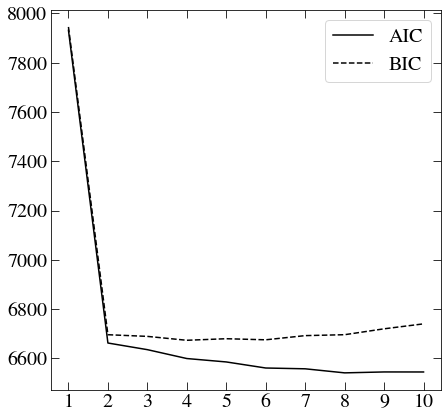

In [282]:
n_gaussians = np.arange(1,number_of_gaussians+8)

models = [GaussianMixture(n_gauss).fit(X) for n_gauss in n_gaussians]
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

if True: # Plot
    fig, ax = plt.subplots(figsize=(7,7))
    ax.plot(n_gaussians,AIC,'k',label='AIC')
    ax.plot(n_gaussians,BIC,'--k',label='BIC')
    ax.set_xticks(n_gaussians)
    ax.minorticks_off()
    plt.legend()
    plt.show()

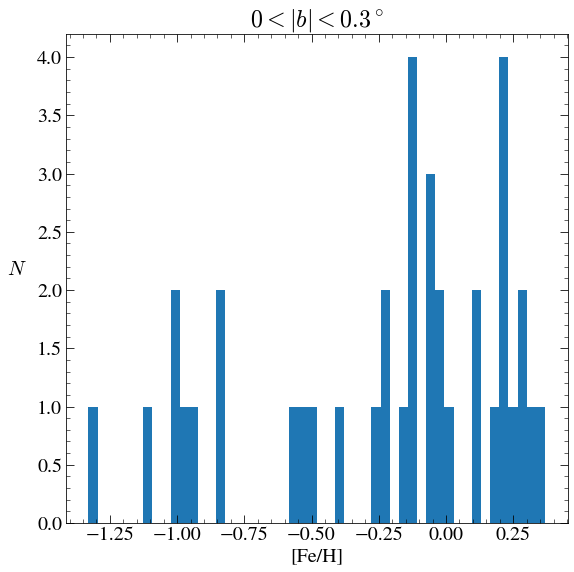

In [316]:
# Metallicity distribution for different latitude ranges

lat_range = np.arange(0,9)
# lat_step = 0.3; lat_range = [0]

for lat_min in lat_range:
    fig, ax = plt.subplots()
    
    ax.hist(data_bulge[(data_bulge['b']>lat_min)&(data_bulge['b']<lat_min+lat_step)]['FeH'],bins=50)
    ax.set_title(fr"${lat_min}<|b|<{lat_min+lat_step}^\circ$")
    ax.set_xlabel("[Fe/H]");ax.set_ylabel(r"$N$",rotation=0,labelpad=20)
    plt.savefig(save_path+'bulge_all_latitudes/'+f"{lat_min}b{lat_min+lat_step}" + '.png')
    plt.show()

## Age windows

In [18]:
mass_density = True
cbar_label = r"$\Sigma \hspace{0.3} [\rm M_\odot kpc^{-2}]$" if mass_density else r"$\Sigma_n \hspace{0.3} [\rm kpc^{-2}]$"

stellar_mass = 9.5*10**3 # stellar masses - see bottom left of page 8 in Debattista 2017\\

In [19]:
#4-7_9.5-10
nrows = 1
ncols = 2

age_lowlims = [4,9.5]
age_highlims =[7,10]
len(age_lowlims)

range_str = "4-7_9.5-10"
print(age_lowlims)
print(age_highlims)

[4, 9.5]
[7, 10]


In [316]:
#0to10_9.X_9.Y
nrows = 3
ncols = 4

X = 5
Y = 9

age_lowlims = [0,1,2,3,4,5,6,7,8,9, 9+0.1*X,9+0.1*Y]
age_highlims =[1,2,3,4,5,6,7,8,9,10,10, 10]
len(age_lowlims)

range_str = "0to10_9.%i_9.%i"%(X,Y)
print(age_lowlims)
print(age_highlims)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9.5, 9.9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10]


In [159]:
#9to10in0.1
nrows = 2
ncols = 5

age_lowlims = np.arange(9,10,0.1)
age_highlims = age_lowlims+0.1
print(age_lowlims,age_highlims,sep='\n')

range_str = "9to10in0.1"

[9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[ 9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10. ]


In [164]:
#0to10in1
nrows = 2
ncols = 5

age_lowlims = np.arange(10)
age_highlims = age_lowlims + 1
print(age_lowlims,age_highlims,sep='\n')

range_str = "0to10in1"

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


In [581]:
#4to10in1
nrows = 2
ncols = 3

age_lowlims = np.arange(4,10,1)
age_highlims = age_lowlims+1
print(age_lowlims,age_highlims,sep='\n')

range_str = "4to10in1"

[4 5 6 7 8 9]
[ 5  6  7  8  9 10]


In [154]:
#testing
nrows = 1
ncols = 2

age_lowlims = [4,9]
age_highlims =[4.1,9.1]
len(age_lowlims)

range_str = "testing"
print(age_lowlims)
print(age_highlims)

[4, 9]
[4.1, 9.1]


In [20]:
print(f"Chose {range_str}")

testing_bool = range_str == "testing"

Chose 4-7_9.5-10


In [21]:
min_star_number = 100

In [22]:
# map dictionaries
variable_symbol_dict, variable_units_dict = mapf.get_position_symbols_and_units_dict(zabs=zabs, degree_symbol=degree_symbol)

_xy_max = 5
_z_max = 3
_long_max = 20 if rot_angle == 90 else 11
_lat_max = 13

_xyz_map_step = 0.3
_xyz_tick_step = 1

l_bins = 15
b_bins = 10

map_min_dict = {
    "l" : -_long_max,
    "b" : 0 if zabs else -_lat_max,
    "d" : 6,
    "x" : -_xy_max,
    "y" : -_xy_max,
    "z" : -_z_max,
    "R" : 0.1,
    "phi" : -180
}
map_max_dict = {
    "l" : _long_max,
    "b" : _lat_max,
    "d" : 10,
    "x" : _xy_max,
    "y" : _xy_max,
    "z" : _z_max,
    "R" : 2, #maybe 1.5 judging by the xy map for 9.8-10 stars
    "phi" : 180
}
map_left_dict,map_right_dict = {},{}
for key in list(map_min_dict.keys()):
    map_left_dict[key] = map_max_dict[key] if key == 'l' else map_min_dict[key]
    map_right_dict[key] = map_min_dict[key] if key == 'l' else map_max_dict[key]

map_tick_step = {
    "l" : 3,
    "b" : 3,
    "d" : 1,
    "x" : _xyz_tick_step,
    "y" : _xyz_tick_step,
    "z" : _xyz_tick_step,
    "R" : 0.5,
    "phi" : 90
}
minor_locator_dict = {
    'R': 0.25,
    'phi': 45,
    'l': 1,
    'b': 1,
    'x': 0.5,
    'y': 0.5,
    "z": 0.5,
    'd': 0.5
}
map_hstep_dict = {
    "l" : (map_max_dict['l']-map_min_dict['l'])/l_bins,   #-10 to 10 with 15 bins gives step of 4/3. -11 to 11 with 16 bins gives step of 11/8
    "x" : _xyz_map_step, #-2 to 2 with 16 bins gives step 0.25
    "z" : _xyz_map_step,
    "R" : (map_max_dict['R']-map_min_dict['R'])/14,
}
o_map_hstep_dict = {
    "l" : 3,
    "b" : 3,
    "x" : 0.5,
    "y" : 0.5,
    "z" : 0.5,
}
map_vstep_dict = {
    "l" : (map_max_dict['l']-map_min_dict['l'])/l_bins,   #-10 to 10 with 15 bins gives step of 4/3. -11 to 11 with 16 bins gives step of 11/8
    "b" : (map_max_dict['b']-map_min_dict['b'])/b_bins,   #0 to 10 with 10 bins gives step of 1
    "y" : _xyz_map_step,
    "z" : _xyz_map_step,
    "phi" : (map_max_dict['phi']-map_min_dict['phi'])/15  #-180 to 180 with 15 bins gives step 24
}
o_map_vstep_dict = {
    "l" : 3,
    "b" : 3,
    "x" : 0.5,
    "y" : 0.5,
    "z" : 0.5
}
#Get the same number of "d" intervals as those of "l", so that the map has square pixels.
#The right d_step is given by l_step*Δd/Δl
map_hstep_dict["d"] = map_vstep_dict["l"]*(map_max_dict["d"]-map_min_dict["d"])/(map_max_dict["l"]-map_min_dict["l"])
map_vstep_dict["d"] = map_hstep_dict["d"]
o_map_hstep_dict["d"] = o_map_vstep_dict["l"]*(map_max_dict["d"]-map_min_dict["d"])/(map_max_dict["l"]-map_min_dict["l"])
o_map_vstep_dict["d"] = o_map_hstep_dict["d"]

In [23]:
extra_variable_min_dict = {
    "b" : 5,
    "d" : 5,
    "y" : -_xy_max,
    "x" : -_xy_max,
    "z" : 0.5,
    "R" : 0,
}
extra_variable_max_dict = {
    "b" : 10,
    "d" : 11,
    "y" : _xy_max,
    "x" : _xy_max,
    "z" : _z_max,
    "R" : 3.5
}
extra_variable_map = {
    "lb" : "R",#"d",
    "dl" : "b",#z
    "xy" : "z",
    "Rphi" : "z",
    "yz": "x",
    "xz": "y"
}

In [24]:
#CHOOSE

x_variable = "x" #d #l
y_variable = "y"

extra_variable = extra_variable_map[x_variable+y_variable]

In [25]:
# Variable limits, ticks

x_min, x_max = map_min_dict[x_variable], map_max_dict[x_variable]
x_left, x_right = map_left_dict[x_variable], map_right_dict[x_variable]
y_min, y_max = map_min_dict[y_variable], map_max_dict[y_variable]
x_step, y_step = map_hstep_dict[x_variable], map_vstep_dict[y_variable]

x_bin_number = MF.return_int_or_dec((x_max-x_min)/x_step)
y_bin_number = MF.return_int_or_dec((y_max-y_min)/y_step)

if data_bool:
    o_x_step, o_y_step = o_map_hstep_dict[x_variable], o_map_vstep_dict[y_variable]
extra_variable_min, extra_variable_max = extra_variable_min_dict[extra_variable], extra_variable_max_dict[extra_variable]
x_units, y_units, extra_variable_units = variable_units_dict[x_variable], variable_units_dict[y_variable], variable_units_dict[extra_variable]

x_label = variable_symbol_dict[x_variable] + r' $[\mathrm{%s}]$'%x_units
y_label = variable_symbol_dict[y_variable] + r' $[\mathrm{%s}]$'%y_units

x_ticks = mapf.get_map_tick_range(x_min,x_max,map_tick_step[x_variable])
y_ticks = mapf.get_map_tick_range(y_min,y_max,map_tick_step[y_variable])

x_minor_ticks = np.arange(x_min, x_max, np.diff(x_ticks)[0]/4)
y_minor_ticks = np.arange(y_min, y_max, np.diff(y_ticks)[0]/4)
x_minor_locator = minor_locator_dict[x_variable]
y_minor_locator = minor_locator_dict[y_variable]

print("You have chosen to work with an "+x_variable+y_variable+" map. The variable "+extra_variable\
      +f" goes from {extra_variable_min} to {extra_variable_max}{extra_variable_units}.")
print(f"{x_variable} defined in range({x_min},{x_max},{str(MF.return_int_or_dec(x_step,2))}), making {x_bin_number} bins%s"\
     %(f", where the left and right limits are {x_left},{x_right}" if x_min!=x_left else ""))
if data_bool:
    print(f"For the data the {x_variable} steps are instead {o_x_step}")
print(f"{y_variable} defined in range({y_min},{y_max},{str(MF.return_int_or_dec(y_step,2))}), making {y_bin_number} bins")
if data_bool:
    print(f"For the data the {y_variable} steps are instead {o_y_step}")
print("Minimum star number is",min_star_number if sim_bool else o_min_star_number)

You have chosen to work with an xy map. The variable z goes from 0.5 to 3kpc.
x defined in range(-5,5,0.3), making 33.3 bins
y defined in range(-5,5,0.3), making 33.3 bins
Minimum star number is 100


In [26]:
def configure_ax():
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(x_minor_locator))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_minor_locator))
    ax.set_xticks(x_ticks);ax.set_yticks(y_ticks)
    ax.set_xlim(x_left,x_right)
    ax.set_ylim(y_min,y_max)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [27]:
x_range = np.arange(x_min,x_max,x_step)
y_range = np.arange(y_min,y_max,y_step)

if True: # Fix potential overflow issue
    # I expect the ranges not to include the max value, but if the step is a periodic number it might. It is actually stated in the documentation:
    # https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
    
    if np.float32(x_range[-1]) == x_max: 
        x_range = x_range[:-1]

    if np.float32(y_range[-1]) == y_max: 
        x_range = y_range[:-1]

cont_extent = [x_min,x_max,y_min,y_max]
hist_extent = [[x_min,x_max],[y_min,y_max]]

print(cont_extent)

[-5, 5, -5, 5]


In [32]:
# steps = True
steps = False

if y_variable == 'y' and not zabs: print("Note top view but zabs is false")
if y_variable == 'z' and zabs: raise ValueError("Note side-on view but zabs is False")


if True: # extra_variable, save_path
    
    save_path = general_path + f"graphs/other_plots/age_windows/{x_variable}{y_variable}/"
    MF.create_dir(save_path)
    
    save_path += f"extra_{extra_variable}/"
    MF.create_dir(save_path)
    
    if steps:
        extra_step = 0.05
        extra_variable_max += extra_step
        extra_min_values = np.arange(extra_variable_min,extra_variable_max,step=extra_step)
        extra_max_values = extra_min_values + extra_step
        save_path += f"slices/step{extra_step}/"
        MF.create_dir(save_path)
    else:
        extra_min_values,extra_max_values = [extra_variable_min],[extra_variable_max]
        
    save_path += range_str+"/"
    MF.create_dir(save_path)
    
    save_path += f"{extra_variable_min}{extra_variable}{extra_variable_max}/"
    MF.create_dir(save_path)
    
    save_path += f"{x_min}{x_variable}{x_max}_{y_min}{y_variable}{y_max}/"
    MF.create_dir(save_path)

print(save_path)

/Users/luismi/Desktop/MRes_UCLan/graphs/other_plots/age_windows/xy/extra_z/4-7_9.5-10/0.5z3/-5x5_-5y5/


In [33]:
df_extra = df0[(np.abs(df0[x_variable])<=x_max)&(df0[y_variable]>=y_min)&(df0[y_variable]<=y_max)&(df0[extra_variable]>=extra_variable_min)&(df0[extra_variable]<=extra_variable_max)]

print(x_min,x_max,y_min,y_max,extra_variable_min,extra_variable_max)

-5 5 -5 5 0.5 3


In [34]:
log_bool = True

cmap = 'magma'
cbar_tick_colour = 'white'
tick_colour = 'white'
age_text_colour = 'white'

white_frame_bool = True # on last two subplots with range_str == "0to10_9.5_9.9"

In [88]:
plotting_lines_bool = x_variable in "xy"

plotting_line_labels = True
# plotting_line_labels = False

# highlight_lines = True
highlight_lines = False

special_lines_bool = False

line_label_fontsize = "x-small" # see https://stackoverflow.com/questions/62288898

if plotting_lines_bool:
    sun_coords = [-R0,0]
    
#     angle_range = [-10,-5,-1.5,1.5,5,10]
    angle_range = [-20,-15,-11,-10,-5,0,5,10,11,15,20]
#     angle_range = [-11,11]
    
    radii_list = [3.5,2.5]
    
    distance_list = np.arange(-3,3+1,1)+8
    
    angle_label = "l" if y_variable == "y" else "b"
    
    angle_label_vals = np.arange(-20,20+5,5)
    distance_label_vals = [6,8,10]
    
    contour_lw = 0.5
    dashes = [20, 10] # length of on / off parts
    
    angle_selection,distance_selection,radius_selection = [],[],[]
    if highlight_lines:
        angle_selection = [-11,11]
        distance_selection = []
        radius_selection = [3.5]
    
    print("Plotting angles:",angle_range)
    print("Plotting distances:",distance_list)
    print("Plotting radii:",radii_list)

Plotting angles: [-20, -15, -11, -10, -5, 0, 5, 10, 11, 15, 20]
Plotting distances: [ 5  6  7  8  9 10 11]
Plotting radii: [3.5, 2.5]


Set contours manually

contour_levels = np.concatenate([np.linspace(10**3,10**4,5),np.linspace(2*10**4,10**5,5),[5*10**5,10**6]])#,np.linspace(2*10**5,5*10**5,5)])
vmax = np.max(contour_levels)
vmin = np.min(contour_levels)
plt.scatter(contour_levels,[0]*len(contour_levels))
print(contour_levels)

In [41]:
def get_gridspec_params(variables, n_rows, n_cols, x_max, y_max):
    if variables[0] == "x":
        fig_size = 10 if nrows*ncols == 2 else 15
        fig_aspect_ratio = 0.9*ncols/nrows*x_max/y_max
        plt.rcParams["font.size"] = 23 if variables[1] == "y" else 27

    elif variables == "lb":
        fig_size = 5
        fig_aspect_ratio = 1.9*(x_max-x_min)/(y_max-y_min)
        plt.rcParams["font.size"] = 15
    
    try:
        return fig_size, fig_aspect_ratio
    except:
        raise ValueError(f"Not implemented for `{variables}` with `{n_panels}`.")

In [42]:
n_bins = 100

gauss_sigma = 1

In [43]:
# If only one figure, pre-calculate the counts here so that the plotting code below does not need re-computing them every time I make a little tweak

if len(extra_min_values) == 1:
    for extra_low, extra_high in zip(extra_min_values, extra_max_values):
        df_slice = df_extra[(df_extra[extra_variable]>extra_variable_min)&(df_extra[extra_variable]<extra_variable_max)]

        #Produce histograms to get number density min and max values, to be able to set appropriate contours
        count_list = []
        for index in range(len(age_lowlims)):
            age_low = age_lowlims[index]
            age_high = age_highlims[index]

            df = df_slice[(df_slice['age']>age_low) & (df_slice['age'] < age_high)]
            counts,_,_ = np.histogram2d(df[x_variable],df[y_variable],bins=n_bins,range=hist_extent,density=True)
            counts = counts.T*len(df) #Multiply by total number to get a surface density rather than probability density
            if mass_density:
                counts *= stellar_mass
            count_list.append(gaussian_filter(counts, gauss_sigma))

In [47]:
# alphabet_bool = True
alphabet_bool = False

# extra_var_string_bool = True
extra_var_string_bool = False

# contour_edges_bool = True
contour_edges_bool = False

In [48]:
aspect_equal = True
# aspect_equal = False

# save_bool = True
save_bool = False

AgeWindows_bins100_0.2levelStep_gauss1_minExtend


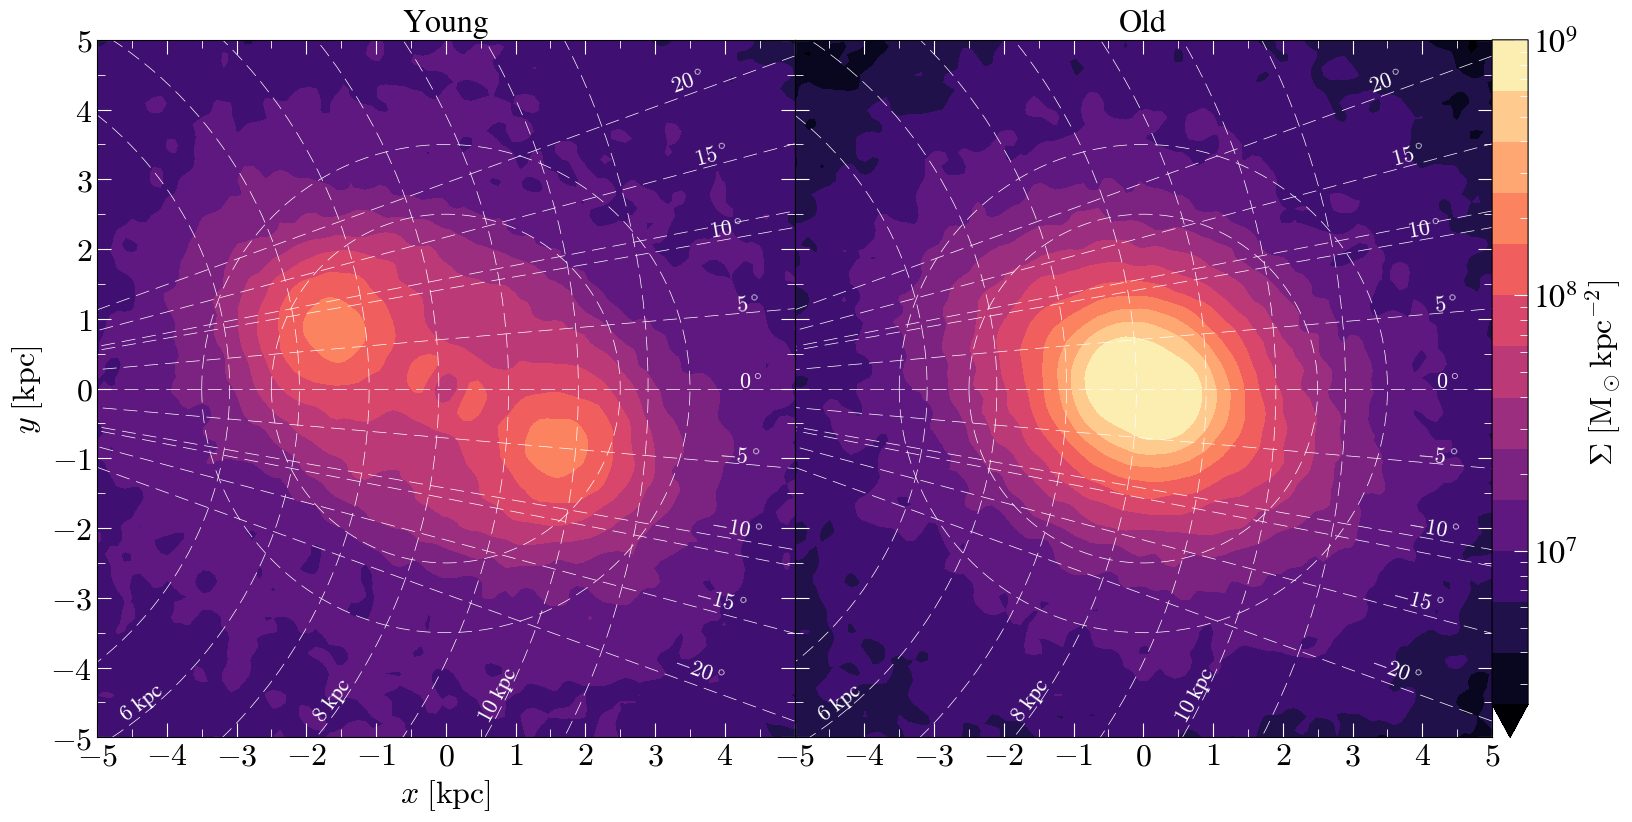

In [89]:
extra_level_factor = 6
# delete_lowest_level = 0
delete_lowest_level = None
level_step = 0.2

for extra_low, extra_high in zip(extra_min_values, extra_max_values):

    if len(extra_min_values) != 1:
        df_slice = df_extra[(df_extra[extra_variable]>extra_min)&(df_extra[extra_variable]<extra_max)]

        #Produce histograms to get number density min and max values, to be able to set appropriate contours
        count_list = []
        for index in range(len(age_lowlims)):
            age_low = age_lowlims[index]
            age_high = age_highlims[index]

            df = df_slice[(df_slice['age']>age_low) & (df_slice['age'] < age_high)]
            counts,_,_ = np.histogram2d(df['x'],df[y_variable],bins=n_bins,range=hist_extent,density=True)
            counts = gaussian_filter(counts.T*len(df),gauss_sigma) #Multiply by total number to get a surface density rather than probability density
            count_list.append(counts)
    
    if True: #fig, contours
        figsize,fig_aspect_ratio = get_gridspec_params(x_variable+y_variable,nrows,ncols,x_max,y_max)

        fig, axs = plt.subplots(figsize=(fig_aspect_ratio*figsize,figsize),nrows=nrows,ncols=ncols,sharey=True,gridspec_kw={'hspace':0,'wspace':0})
        vmax = np.nanmax(count_list)
    #     vmax = 10**9
        
#         vmin = 10**6 if stellar_mass else 10**3
#         vmin = 10**5
        vmin = np.nanmin(count_list)
        
        if vmin == 0: vmin = 0.1
            
        norm = LogNorm(vmin=vmin,vmax=vmax) if log_bool else None
        
        if True: #contour levels
        #     contour_levels = None
            contour_levels = np.array([10**i for i in np.arange(int(np.log10(vmin)),int(np.log10(vmax))+level_step*extra_level_factor,level_step)])
            contour_levels = contour_levels[contour_levels > np.nanmin(count_list)]
            if delete_lowest_level is not None: contour_levels = np.delete(contour_levels, delete_lowest_level)

            if True: # cbar extends
                top_extend = np.nanmax(count_list) > max(contour_levels)
                bottom_extend = np.nanmin(count_list) < min(contour_levels)

                cbar_extend = "neither"
                if top_extend and bottom_extend:
                    cbar_extend = 'both'
                if top_extend and not bottom_extend:
                    cbar_extend = "max"
                if not top_extend and bottom_extend:
                    cbar_extend = "min"

        axs = axs.ravel()

    for index in range(len(age_lowlims)): # plot, lims, ticks, lines
        
        if True: # plot
            age_low, age_high = age_lowlims[index], age_highlims[index]

            if testing_bool:
                axs[index].set_facecolor("k")
            else:
                c = axs[index].contourf(count_list[index],extent=cont_extent,levels=contour_levels,extend=cbar_extend,cmap=cmap,norm=norm)

                if contour_edges_bool:
                    axs[index].contour(count_list[index],extent=cont_extent,levels=contour_levels,extend=cbar_extend,norm=norm,colors="k",linewidths=0.3)

        if True: # lims, ticks
            if aspect_equal:
                axs[index].set_aspect('equal')
                
            if True: # remove overlapping tick labels
                
                x_tick_labels = [r"$%s$"%str(MF.check_int(tick)) for tick in x_ticks]
                
                if x_ticks[-1] == x_right:
                    if index != ncols - 1:
                        x_tick_labels[-1] = None
#                 if x_ticks[0] == x_left:
#                     if index % ncols != 0:
#                         x_tick_labels[0] = None
            
            axs[index].set_xticks(x_ticks);axs[index].set_yticks(y_ticks)
            axs[index].set_xticklabels(x_tick_labels)
            axs[index].set_yticklabels([r"$%s$"%str(MF.check_int(tick)) for tick in y_ticks])
            axs[index].yaxis.set_minor_locator(ticker.MultipleLocator(x_minor_locator))
            axs[index].xaxis.set_minor_locator(ticker.MultipleLocator(y_minor_locator))
            axs[index].tick_params(axis='both', which='both', color=tick_colour)
            
            axs[index].set_xlim(x_left,x_right);axs[index].set_ylim(y_min,y_max)
        
            if index % ncols == 0: 
                axs[index].set_ylabel(y_label)
            if index < nrows:
                axs[index].set_xlabel(x_label)

        if plotting_lines_bool:
            highlight_factor = 3
            
            for ang in angle_range:
                if ang in angle_selection:
                    
                    x_select = np.array(radius_selection)*np.cos(np.radians(ang))-abs(sun_coords[0])
                    y_select = np.array(radius_selection)*np.sin(np.radians(ang))
                    
                    # outbound pieces
                    axs[index].plot([sun_coords[0],x_select[0]],[sun_coords[1],y_select[0]], 'w--',linewidth=contour_lw,dashes=dashes)
                    axs[index].plot([x_select[1],x_max],[y_select[1],(x_max+abs(sun_coords[0])) * np.tan(np.radians(ang))], 'w--',linewidth=contour_lw,dashes=dashes)
                    
                    # highlighted piece
                    axs[index].plot(x_select,y_select, 'w--',linewidth=highlight_factor*contour_lw,dashes=[d/highlight_factor for d in dashes])
                else:
                    axs[index].plot([sun_coords[0],x_max],[sun_coords[1],(x_max+abs(sun_coords[0])) * np.tan(np.radians(ang))], 'w--',linewidth=contour_lw,dashes=dashes)
                
                if plotting_line_labels and ang in angle_label_vals:
                    neg_shift = 0.25 if len(str(ang)) > min([len(str(a)) for a in angle_label_vals]) else 0
                    
                    ang_label_x = 12.3*np.cos(np.radians(ang))-abs(sun_coords[0])-neg_shift
                    
                    axs[index].text(x=ang_label_x,y=(ang_label_x+abs(sun_coords[0]))*np.tan(np.radians(ang))*1.03,\
                                    s=fr"${ang}^\circ$",color="w",rotation=ang,size=line_label_fontsize)
            
            for distance in distance_list:
                
                if distance in distance_selection:
                    x_outer,y_outer = PH.get_ellipse_coords(distance, phirange=[angle_selection[1],angle_selection[0]])
                    axs[index].plot(x_outer+sun_coords[0],y_outer+sun_coords[1], 'w--',linewidth=contour_lw,dashes=dashes)
                    
                    x_inner,y_inner = PH.get_ellipse_coords(distance, phirange=[angle_selection[0],angle_selection[1]])
                    axs[index].plot(x_inner+sun_coords[0],y_inner+sun_coords[1], 'w--',linewidth=highlight_factor*contour_lw,dashes=[d/highlight_factor for d in dashes])
                else:
                    x_circ,y_circ = PH.get_ellipse_coords(distance)
                    axs[index].plot(x_circ+sun_coords[0],y_circ+sun_coords[1], 'w--',linewidth=contour_lw,dashes=dashes)
                    
                if plotting_line_labels and distance in distance_label_vals:
                    low_y = 0.95*y_min
                    
                    x_intersect = np.sqrt(distance**2 - low_y**2)
                    slope = -x_intersect / np.sqrt(distance**2 - x_intersect**2)
                    rot = -np.degrees(np.arctan(slope))
                    
                    indices_white_background = [0] if y_variable == "z" and np.diff(age_lowlims)[0] == 1 else []
                    bbox = {'color':'white','boxstyle':'round','alpha':0.8} if index in indices_white_background else None
                    d_color = 'k' if index in indices_white_background else 'white'
                    
                    axs[index].text(x=x_intersect-abs(sun_coords[0])-0.3,y=low_y,s=fr"${distance}$ kpc",color=d_color,rotation=rot,size=line_label_fontsize,bbox=bbox)
            
            for radius in radii_list:

                if radius in radius_selection:
                    x_outer,y_outer = PH.get_ellipse_coords(radius)#, phirange=[angle_selection[1],angle_selection[0]])
                    axs[index].plot(x_outer,y_outer, 'w--',linewidth=contour_lw,dashes=dashes)
                    
                    x_inner,y_inner = PH.get_ellipse_coords(radius)#, phirange=[angle_selection[0],angle_selection[1]])
                    axs[index].plot(x_inner,y_inner, 'w--',linewidth=highlight_factor*contour_lw,dashes=[d/highlight_factor for d in dashes])
                else:
                    x_circ,y_circ = PH.get_ellipse_coords(radius)
                    axs[index].plot(x_circ,y_circ, 'w--',linewidth=contour_lw,dashes=dashes)
        
        if nrows*ncols == 2:
            axs[index].set_title(["Young","Old"][index])
        else: # inline age labels
            age_string = str(MF.return_int_or_dec(age_low))
            age_string += "-"
            age_string += str(MF.return_int_or_dec(age_high))
            age_string += " Gyr"
            full_age_str = f"({'abcdefghijkl'[index]}) {age_string}" if alphabet_bool else age_string

            string_length = len(full_age_str)
            x_text = 8/9*x_min
            y_text = (5/6 if y_variableiable == "y" else 4/5)*y_max

            indices_white_background = [0] if y_variableiable == "z" and np.diff(age_lowlims)[0] == 1 else []

            bbox = {'color':'white','boxstyle':'round','alpha':0.8} if index in indices_white_background else None
            age_text_colour = 'k' if index in indices_white_background else 'white'
            axs[index].text(x=x_text,y=y_text,s=full_age_str,color=age_text_colour,bbox=bbox)        
        
        if white_frame_bool:
            if range_str == "_0to10_9.5_9.9" and index >= len(age_lowlims) - 2:
                axs[index].spines['top'].set_linewidth(4)
                axs[index].spines['top'].set_color("white")
                if index == len(age_lowlims) - 2:
                    axs[index].spines['left'].set_linewidth(4)
                    axs[index].spines['left'].set_color("white")
    
    if not testing_bool: #colorbar

#         cbar_spacing = 'proportional'
        cbar_spacing = 'uniform'
        
        if range_str == "4-7_9.5-10":
            cax = fig.add_axes([axs[1].get_position().x1,axs[1].get_position().y0,0.02,axs[1].get_position().y1-axs[1].get_position().y0])
            cbar = plt.colorbar(c,cax=cax,spacing=cbar_spacing)
        else:
            cbar_fraction = 0.02
            cbar = plt.colorbar(c,ax=axs,pad=0.04,spacing=cbar_spacing,fraction=cbar_fraction)#,extendfrac='auto')

        cbar_ax = cbar.ax
        cbar_ax.set_ylabel(cbar_label)
        
        if True: #cbar ticks
            cbar_ax.minorticks_on()
            
#             Take those contour levels of form 10^x
            rounded_contours = np.array([MF.check_int(np.float32(np.log10(lev))) for lev in contour_levels])
                
            cbar_ticks = contour_levels[rounded_contours == rounded_contours.astype(int)]
            
#             cbar_ticks = contour_levels
            
            cbar.set_ticks(cbar_ticks)
            
            cbar_ax.tick_params(which='minor',color=cbar_tick_colour)
            cbar_ax.tick_params(which='major',color=cbar_tick_colour)
    
    if extra_var_string_bool: #extra string textbox
        decimals = ".1f" if np.max([len(str(extra_max)),len(str(extra_min))]) < 4 else ".2f"
        low_decimal = decimals; high_decimal = decimals
        if isinstance(extra_min,int): low_decimal = 'i'
        if isinstance(extra_max,int): high_decimal = 'i'
        
        extra_x_text = x_max*5.1/5
        extra_y_text = -y_max*(5.85/5 if nrows == 1 else 6.1/5)
            
        if extra_min == -extra_max or (extra_min == 0 and zabs):
            extra_range_string = fr'$|%s|<%{high_decimal}$'%(extra_variable,extra_max)+r"$\hspace{%s}\mathrm{%s}$"%('0.2' if extra_variable_units != '^\circ' else '0',extra_variable_units)
        else:
#             if extra_variable_units == '^\circ': extra_variable_units = 'deg'
            extra_x_text -= 0.8
            
            extra_range_string = fr'$%{low_decimal}<|{extra_variable}|<%{high_decimal}$'%(extra_min,extra_max)+r"$\hspace{%s}\mathrm{%s}$"%('0.2' if extra_variable_units != '^\circ' else '0',extra_variable_units)
        
        axs[-1].text(x=extra_x_text,y=extra_y_text,s=extra_range_string,size="small",bbox=dict(boxstyle="square",fc='white',lw=0.03))

        extra_string = f'_%{low_decimal}{extra_variable}%{high_decimal}'%(MF.check_int(extra_min) if (extra_min != -extra_max or y_variable == 'z') else 0,MF.check_int(extra_max))  
    
    if not testing_bool: # filename and save
    
        special_lines_string = '_specialLines' if (y_variable == 'z' and special_lines_bool) else ''
        n_bins_string = f'_bins{n_bins}'
        gauss_sigma_string = f'_gauss{gauss_sigma}'
        extend_string = f'_{cbar_extend}Extend' if cbar_extend != 'neither' else ''
        lines_string = "_noLines" if x_variable in "xy" and not plotting_lines_bool else ""
        contour_edges_string = "_edgesOn" if contour_edges_bool else ""
        
        level_step_string = f"_{level_step}levelStep"
        
#         line_selection_str = "_"
#         GC_circle_string = "_3.5GC" if plotting_GC_circle else ""

        filename =\
        f"AgeWindows{special_lines_string}{n_bins_string}{level_step_string}{gauss_sigma_string}{extend_string}{lines_string}{contour_edges_string}"
        print(filename)
    
        if save_bool:
            print("Saving in",save_path)
            for save_format in ['.png','.pdf']:
                plt.savefig(save_path + filename + save_format,bbox_inches='tight',dpi=300)
                print('Saved '+save_format)
    plt.show()

In [ ]:
#old imshow
def is_int(x):
    return int(x)==x

limit = 10
xy_max=5;xy_min=-xy_max
ticks = np.arange(x_min,x_max+1)
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,sharey=True,sharex=True,gridspec_kw={'hspace':0,'wspace':0})
vmax = np.max(count_list)
# vmin = np.min(count_list) if np.min(count_list) != 0 else 1
# cbar_extend = 'neither'
vmin = 10
cbar_extend = 'min'

axs = axs.ravel()

for index in range(len(age_lowlims)):
    age_low = age_lowlims[index]
    age_high = age_highlims[index]
    
    counts = count_list[index]
    im = axs[index].imshow(counts,norm=LogNorm(vmin=vmin,vmax=vmax),origin='lower',extent=[xy_min,xy_max]*2,aspect='equal')
        
    counts = gaussian_filter(counts,1)
    contour_color = 'red'
    axs[index].contour(counts,extent=[xy_min,xy_max,xy_min,xy_max],levels=contour_levels,colors=contour_color)#,100,500],cmap='Reds')
    
    axs[index].set_xlim(xy_min,xy_max)
    axs[index].set_ylim(xy_min,xy_max)
    
    axs[index].set_aspect('equal')
    axs[index].set_xticks(ticks)
    axs[index].set_yticks(ticks)
    
    axs[index].tick_params(labelsize=16)
    axs[index].set_xticklabels([r"$%s$"%str(MF.check_int(tick)) for tick in ticks])
    axs[index].set_yticklabels([r"$%s$"%str(MF.check_int(tick)) for tick in ticks])
    
    axs[index].tick_params(axis='both', colors='grey')
    [t.set_color('black') for t in axs[index].xaxis.get_ticklabels()]
    [t.set_color('black') for t in axs[index].yaxis.get_ticklabels()]
    
    if axs[index].is_first_col():
        axs[index].set_ylabel(r"$y$ [kpc]")
    if axs[index].is_last_row():
        axs[index].set_xlabel(r"$x$ [kpc]")
    
    age_string = str(MF.check_int(age_low)) if is_int(age_low) else "%.1f"%age_low
    age_string += "-"
    age_string += str(MF.check_int(age_high)) if is_int(age_high) else "%.1f"%age_high
    age_string += " Gyr"
    x_text = x_text_dict[len(age_string)]
    if range_str == "_0to10_9.5_9.8":
        if len(age_string) == 10:
            x_text += 0.55
        else:
            x_text += 0.4
        y_text = 2
    else:
        y_text = 2.2
    axs[index].text(x=x_text,y=y_text,s=age_string,color='white',fontsize=11)
    
    if range_str == "_0to10_9.5_9.8" and index >= len(age_lowlims) - 2:
        axs[index].spines['top'].set_linewidth(2)
        axs[index].spines['top'].set_color("white")
        if index == len(age_lowlims) - 2:
            axs[index].spines['left'].set_linewidth(2)
            axs[index].spines['left'].set_color("white")
    
axs[-1].text(x=5,y=-4.8,s=fr'$|z|<{z_max}$',size=15)
cbar_ax = fig.add_axes(cbar_ax_params)
cbar = plt.colorbar(im,cax=cbar_ax,extend=cbar_extend)
cbar.set_ticks([10**i for i in range(1,5)])
cbar_ax.set_ylabel(r"$N$",labelpad=15,rotation=0)
cbar_ax.tick_params(which='minor',size=10)
cbar_ax.tick_params(which='major',size=18)

filename = "AgeWindows" + range_str + f"_contour{contour_levels}"
# plt.savefig(save_path + filename + ".pdf",bbox_inches='tight')#,dpi=150)
plt.show()

## Apogee windows

In [33]:
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

In [34]:
i_lb, i_db, i_xy, i_xz = 0,1,2,3

In [35]:
# set limits

max_b,min_b,max_l,min_l,max_d,min_d = data['b'].max(),data['b'].min(),data['l'].max(),data['l'].min(),data['d'].max(),data['d'].min()
max_y,min_y,max_x,min_x,max_z,min_z = data['y'].max(),data['y'].min(),data['x'].max(),data['x'].min(),data['z'].max(),data['z'].min()

lims_dict = {
    i_lb: [max_l,min_l,min_b,max_b],
    i_db: [min_d,max_d,min_b,max_b],
    i_xy: [min_x,max_x,min_y,max_y],
    i_xz: [min_x,max_x,min_z,max_z]
}

# These will take effect if setting bulge_bool=True below
xmin,xmax,ymin,ymax,zmax,lmin,lmax,bmax,dmin,dmax=-2,2,-2,2,1.4,-10,10,10,6,10
zmin,bmin = 0.15,1#0,0 
minmax_dict = {
    i_lb: [lmin,lmax,bmin,bmax],
    i_db: [dmin,dmax,bmin,bmax],
    i_xy: [xmin,xmax,ymin,ymax],
    i_xz: [xmin,xmax,zmin,zmax]
}

In [ ]:
plt.con

In [36]:
bulge_bool = False
drawlims_bool = False

n_bin = 70

cut_lw = 0.75

In [38]:
#Generate histograms

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10),gridspec_kw={'wspace':0.3,'hspace':-0.43})#,'width_ratios':[1,1],'height_ratios':[2,1]})#[[1,1],[1,0.5]]

axs = np.ravel(axs)

cmap = 'viridis'

l_bins = n_bin
b_bins_lb = int(l_bins*(max_b-min_b)/(max_l-min_l))
h1 = axs[i_lb].hist2d(data['l'],data['b'],bins=[l_bins,b_bins_lb],cmap=cmap,norm=LogNorm())
axs[i_lb].set_xlabel(r'$l$ [%s]'%degree_symbol);axs[i_lb].set_ylabel(r'$|b|$ [%s]'%degree_symbol)
axs[i_lb].set_xticks(np.arange(-10,10+2,2));axs[i_lb].set_xticks(np.arange(-10,10+1,1),minor=True);
axs[i_lb].set_yticks(np.arange(0,int(max_b)+2,2));axs[i_lb].set_yticks(np.arange(0,max_b+1,1),minor=True);
axs[i_lb].set_xlim(data['l'].max(),data['l'].min())

d_bins = n_bin
db_aspect = 0.325
b_bins_db = int(d_bins*db_aspect*(max_b-min_b)/(max_d-min_d))
h2 = axs[i_db].hist2d(data['d'],data['b'],bins=[d_bins,b_bins_db],cmap=cmap,norm=LogNorm())
axs[i_db].set_xlabel(r'$d$ [kpc]');axs[i_db].set_ylabel(r'$|b|$ [%s]'%degree_symbol);axs[i_db].set_yticks([0,5,10]);axs[i_db].set_yticks([0,5,10])
axs[i_db].set_aspect(db_aspect)

x_bins = n_bin
y_bins = int(x_bins*(max_y-min_y)/(max_x-min_x))
h3 = axs[i_xy].hist2d(data['x'],data['y'],bins=[x_bins,y_bins],cmap=cmap,norm=LogNorm())
axs[i_xy].set_xlabel(r'$x$ [kpc]');axs[i_xy].set_ylabel(r'$y$ [kpc]');axs[i_xy].set_xticks([-3,-2,-1,0,1,2,3]);axs[i_xy].set_yticks([-2,-1,0,1,2])

x_bins = n_bin
z_bins = int(x_bins*(max_z-min_z)/(max_x-min_x))
h4 = axs[i_xz].hist2d(data['x'],data['z'],bins=[x_bins,z_bins],cmap=cmap,norm=LogNorm())
axs[i_xz].set_xlabel(r'$x$ [kpc]');axs[i_xz].set_ylabel(r'$|z|$ [kpc]');axs[i_xz].set_xticks([-3,-2,-1,0,1,2,3]);axs[i_xz].set_yticks([0,1,2])

for ax_index in [i_lb,i_xy,i_xz]:
    axs[ax_index].set_aspect('equal')
    
# plt.savefig(general_path+'apogee_windows.png',bbox_inches='tight', dpi=150)
# print(general_path+'apogee_windows.png')
plt.close()

In [39]:
save_bool = False

save_path = general_path + '708main_simulation/graphs/Observations/Apogee/apogee_windows/'

if True: #filename
    
    drawlims_string = '_drawlims' if drawlims_bool else ''
    bulge_string = '_bulge' if bulge_bool else ''
    
    filename = f"apogee_windows_bin{n_bin}{drawlims_string}"
    print(filename)

apogee_windows_bin70


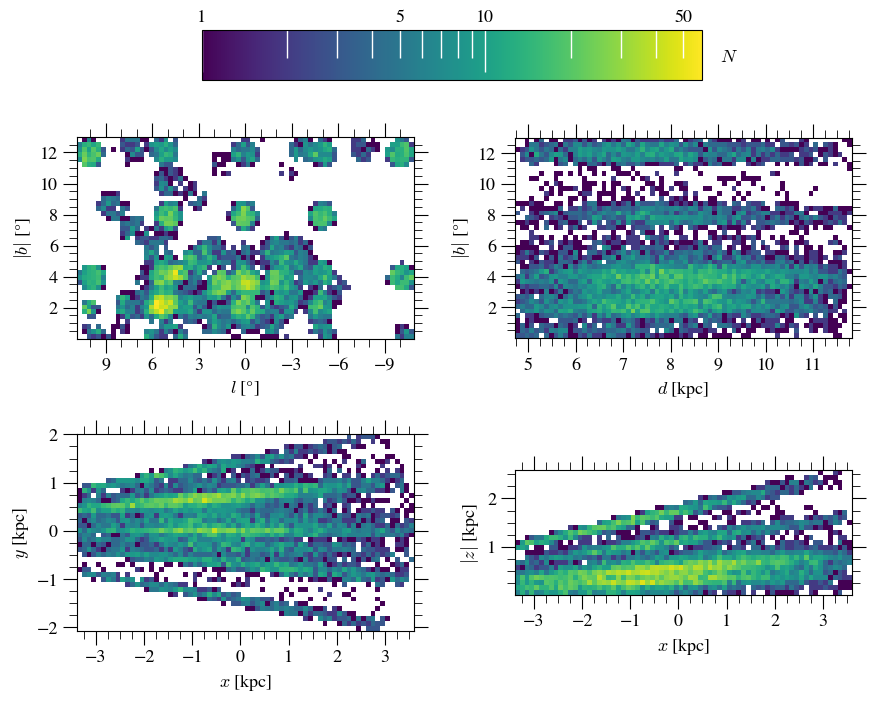

In [43]:
# Plot

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10),gridspec_kw={'wspace':0.3,'hspace':-0.38})#,'width_ratios':[1,1],'height_ratios':[2,1]})#[[1,1],[1,0.5]]

axs = np.ravel(axs)

vmax = np.max([np.max(h1[0]),np.max(h2[0]),np.max(h3[0]),np.max(h4[0])])
cmap = 'viridis'

norm = LogNorm(vmax=vmax)

im1 = axs[i_lb].imshow(h1[0].T,cmap=cmap,extent=[min_l,max_l,min_b,max_b],origin='lower',norm=norm)
axs[i_lb].set_xlabel(r'$l$ [%s]'%degree_symbol);axs[i_lb].set_ylabel(r'$|b|$ [%s]'%degree_symbol)
axs[i_lb].set_xticks(np.arange(-9,9+3,3));axs[i_lb].set_xticks(np.arange(-10,10+1,1),minor=True);
axs[i_lb].set_yticks(np.arange(0,int(max_b)+2,2));axs[i_lb].set_yticks(np.arange(0,max_b+0.5,0.5),minor=True);
axs[i_lb].invert_xaxis()

im2 = axs[i_db].imshow(h2[0].T,cmap=cmap,extent=[min_d,max_d,min_b,max_b],origin='lower',norm=norm)
axs[i_db].set_xlabel(r'$d$ [kpc]');axs[i_db].set_ylabel(r'$|b|$ [%s]'%degree_symbol);axs[i_db].set_xticks(np.arange(4,12,0.25), minor=True);axs[i_db].set_xlim(min_d,max_d)
axs[i_db].set_xticks(np.arange(5,11+1,1));axs[i_db].set_yticks(np.arange(0,int(max_b)+2,2));axs[i_db].set_yticks(np.arange(0,max_b+0.5,0.5),minor=True)#axs[i_db].set_yticks([0,5,10])
axs[i_db].set_aspect(db_aspect)

im3 = axs[i_xy].imshow(h3[0].T,cmap=cmap,extent=[min_x,max_x,min_y,max_y],origin='lower',norm=norm)
axs[i_xy].set_xlabel(r'$x$ [kpc]');axs[i_xy].set_ylabel(r'$y$ [kpc]');axs[i_xy].set_xticks([-3,-2,-1,0,1,2,3]);axs[i_xy].set_yticks([-2,-1,0,1,2])
axs[i_xy].set_xticks(np.arange(-4,4,0.25), minor=True);axs[i_xy].set_yticks(np.arange(-3,3,0.25), minor=True)

im4 = axs[i_xz].imshow(h4[0].T,cmap=cmap,extent=[min_x,max_x,min_z,max_z],origin='lower',norm=norm)
axs[i_xz].set_xlabel(r'$x$ [kpc]');axs[i_xz].set_ylabel(r'$|z|$ [kpc]');axs[i_xz].set_xticks([-3,-2,-1,0,1,2,3]);axs[i_xz].set_yticks([0,1,2])
axs[i_xz].set_xticks(np.arange(-4,4,0.25), minor=True);axs[i_xz].set_yticks(np.arange(0,3,0.25), minor=True)

for ax_index in [i_lb,i_xy,i_xz]:
    axs[ax_index].set_aspect('equal')

if bulge_bool:
    axs[i_lb].set_xlim(lmax,lmin);axs[i_lb].set_ylim(bmin,bmax)
    axs[i_db].set_xlim(dmin,dmax);axs[i_lb].set_ylim(bmin,bmax)
    axs[i_xy].set_xlim(xmin,xmax);axs[i_xy].set_ylim(ymin,ymax)
    axs[i_xz].set_xlim(xmin,xmax);axs[i_xz].set_ylim(zmin,zmax)
elif drawlims_bool:
    for i in [i_lb,i_db,i_xy,i_xz]:
        xmin,xmax,ymin,ymax=minmax_dict[i]
        axs[i].plot([xmin,xmin],[ymin,ymax],color='red',linewidth=cut_lw);axs[i].plot([xmax,xmax],[ymin,ymax],color='red',linewidth=cut_lw)
        axs[i].plot([xmin,xmax],[ymin,ymin],color='red',linewidth=cut_lw);axs[i].plot([xmin,xmax],[ymax,ymax],color='red',linewidth=cut_lw)
        
for i in [i_lb,i_db,i_xy,i_xz]:
    xleft,xright,yleft,yright = lims_dict[i]
    axs[i].set_xlim(xleft,xright);axs[i].set_ylim(yleft,yright)
    
cbar_ax = fig.add_axes([0.25, 0.8, 0.5, 0.05]) #left,bottom,width,height
fig.colorbar(im4, cax=cbar_ax,orientation='horizontal')
cbar_ax.tick_params(axis='x',which='both',top=True,bottom=False,labelbottom=False,labeltop=True,direction='in',color='white')
cbar_ax.tick_params(which='major',length=30,width=1);cbar_ax.tick_params(which='minor',length=20,width=1);cbar_ax.set_ylabel(r'$N$',rotation=0,labelpad=-380,y=0.3)
major_ticks,minor_ticks = np.array(cbar_ax.get_xticks()),np.array(cbar_ax.get_xticks(minor=True))
cbar_ax.set_xticklabels([str(i) for i in major_ticks.astype(int)])
cbar_ax.set_xticklabels([str(i) if '5' in str(i) else '' for i in minor_ticks.astype(int)], minor=True)

if save_bool:
    print("Saving:",save_path+filename)
    for fileformat in [".png",".pdf"]:
        plt.savefig(save_path+filename+fileformat,bbox_inches='tight', dpi=200)
        print(fileformat)
plt.show()

In [78]:
8.2-3.5,8.2+3.5

(4.699999999999999, 11.7)

In [77]:
data["d"].min(),data["d"].max()

(4.7187, 11.8137)

In [69]:
#Set this back

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Checks

## bz conversion

In [76]:
cmap = cm.get_cmap('plasma')

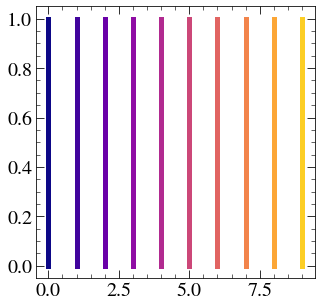

In [77]:
fig,ax=plt.subplots(figsize=(5,5))
for i in np.arange(0,1,0.1):
    ax.plot([0+i*10,0+i*10],[0,1],color=cmap(i),lw=5)
plt.show()

In [78]:
# save_bool = True
save_bool = False

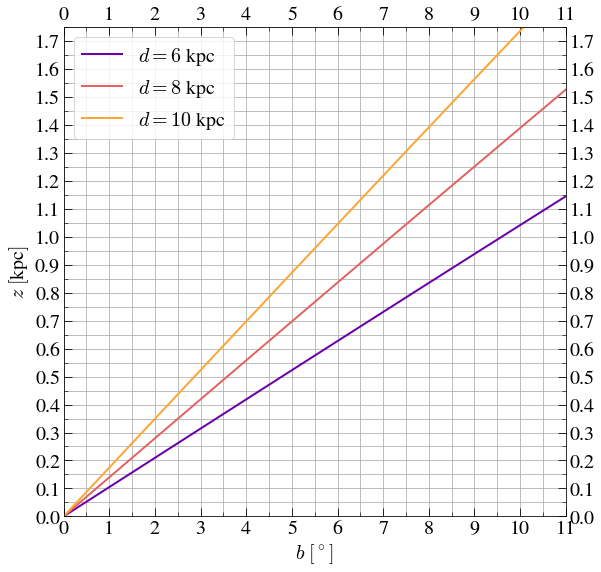

In [79]:
# bmax with different d lines

bmin,bmax=0,10

fig,ax=plt.subplots()
b = np.linspace(bmin,bmax,50)

for d,c in zip([6,8,10],[0.2,0.6,0.8]):
    z = np.sin(np.radians(b))*d
    ax.plot(b,z,color=cmap(c),label=fr'$d={d}$'+' kpc',lw=2)
if True: # lims, ticks, grid

    ax.set_xlabel(r'$b \hspace{0.3}[^\circ]$')
    ax.set_ylabel(r'$z$'+ r" $[$kpc$]$")
    ax.tick_params(labelright=True,labeltop=True)
    
    ax.set_xticks(np.arange(bmin,bmax+1,1))
    ax.set_xticks(np.arange(bmin,bmax+0.5,0.5),minor=True)
    ax.set_xlim(bmin,bmax)
    
    zmin = min(z)
    zmax = 1.75
    ax.set_yticks(np.arange(zmin,zmax+0.1,0.1))
    ax.set_yticks(np.arange(zmin,zmax+0.05,0.05),minor=True)
    ax.set_ylim(zmin,zmax)
    
    plt.grid(which='both')
plt.legend()
if save_bool:
    filename = f'conversion_b{bmax}.png'
    plt.savefig(general_path+'708main_simulation/graphs/'+filename,dpi=200,bbox_inches='tight')
    print("Saved:",filename)
plt.show()

In [ ]:
# bmax with different x lines

bmin,bmax=0,10

fig,ax=plt.subplots()
b = np.linspace(bmin,bmax,50)

for d,c in zip([6,8,10],[0.2,0.6,0.8]):
    z = np.sin(np.radians(b))*d
    ax.plot(b,z,color=cmap(c),label=fr'$d={d}$'+' kpc',lw=2)
if True: # lims, ticks, grid

    ax.set_xlabel(r'$b \hspace{0.3}[^\circ]$')
    ax.set_ylabel(r'$z$'+ r" $[$kpc$]$")
    ax.tick_params(labelright=True,labeltop=True)
    
    ax.set_xticks(np.arange(bmin,bmax+1,1))
    ax.set_xticks(np.arange(bmin,bmax+0.5,0.5),minor=True)
    ax.set_xlim(bmin,bmax)
    
    zmin = min(z)
    zmax = 1.75
    ax.set_yticks(np.arange(zmin,zmax+0.1,0.1))
    ax.set_yticks(np.arange(zmin,zmax+0.05,0.05),minor=True)
    ax.set_ylim(zmin,zmax)
    
    plt.grid(which='both')
plt.legend()
if save_bool:
    filename = f'conversion_b{bmax}.png'
    plt.savefig(general_path+'708main_simulation/graphs/'+filename,dpi=200,bbox_inches='tight')
    print("Saved:",filename)
plt.show()

In [21]:
save_bool = True

Saved: conversion_z1.9.png


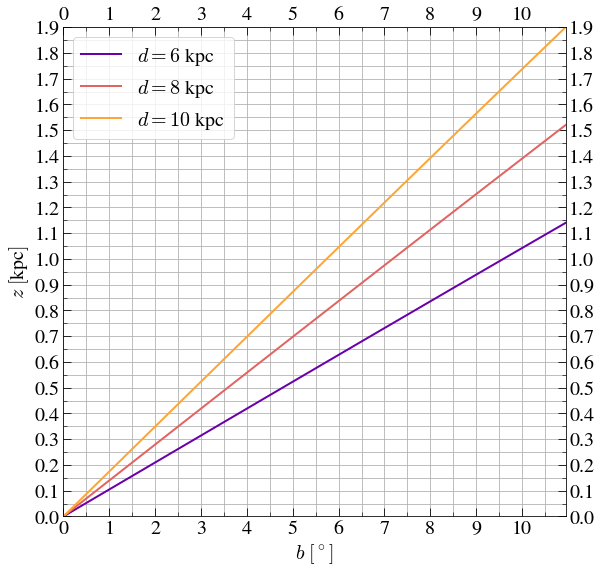

In [23]:
#zmax

zmin,zmax=0,1.9

fig,ax=plt.subplots()
z = np.linspace(zmin,zmax,50)

for d,c in zip([6,8,10],[0.2,0.6,0.8]):
    b = np.degrees(np.arcsin(z/d))
    ax.plot(b,z,color=cmap(c),label=fr'$d={d}$'+' kpc',lw=2)
if True: # lims, ticks, grid

    ax.set_xlabel(r'$b \hspace{0.3}[^\circ]$')
    ax.set_ylabel(r'$z$'+ r" $[$kpc$]$")
    ax.tick_params(labelright=True,labeltop=True)
    
    bmin = min(b)
    bmax = max(b)
    ax.set_xticks(np.arange(bmin,bmax+1,1))
    ax.set_xticks(np.arange(bmin,bmax+0.5,0.5),minor=True)
    ax.set_xlim(bmin,bmax)
    
    ax.set_yticks(np.arange(zmin,zmax+0.1,0.1))
    ax.set_yticks(np.arange(zmin,zmax+0.05,0.05),minor=True)
    ax.set_ylim(zmin,zmax)
    
    plt.grid(which='both')
plt.legend()
if save_bool:
    filename = f'conversion_z{zmax}.png'
    plt.savefig(general_path+'708main_simulation/graphs/'+filename,dpi=200,bbox_inches='tight')
    print("Saved:",filename)
plt.show()

## Bootstrap convergence

In [8]:
array = np.random.uniform(10,size=100)

In [57]:
def compute_quantity(array):
    return np.percentile(array,95)/np.std(array)

In [61]:
true_val = compute_quantity(array) # made up metric
print(true_val)

3.48722146850673


In [52]:
repeat_list = [10**i for i in range(7)]
mean_val_list = []

for R in repeat_list:
    boot_val_list = []
    for _ in range(R):
        bootstrap_array = np.random.choice(array,size=len(array),replace=True)
        boot_value = compute_quantity(bootstrap_array)
        boot_val_list.append(boot_value)
    mean_val_list.append(np.mean(boot_val_list))
    print("Done:",R)

Done: 1
Done: 10
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000


In [54]:
print(repeat_list[2:],'\n',mean_val_list[2:])

[100, 1000, 10000, 100000, 1000000] 
 [3.5580700012693307, 3.5430693394376744, 3.5480339923952444, 3.5487988454462025, 3.5488596897420104]


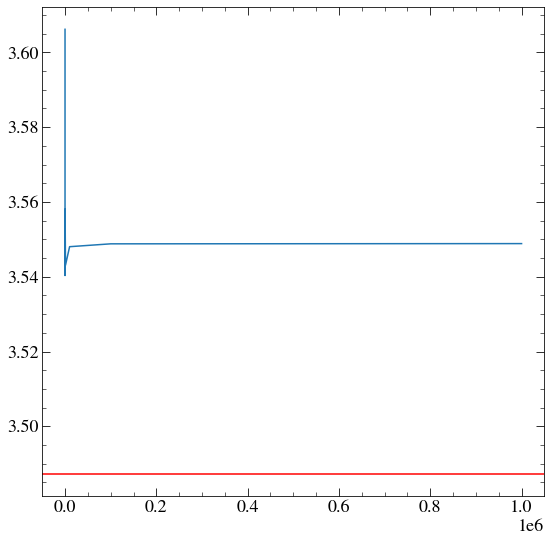

In [56]:
fig,ax=plt.subplots()
ax.axhline(y=true_val,color='red')
ax.plot(repeat_list, mean_val_list)
plt.show()

## Vertex error

In [72]:
vr = data_bulge_poor[np.abs(data_bulge_poor['l'])<1].vr.values
vl = data_bulge_poor[np.abs(data_bulge_poor['l'])<1].vl.values

In [128]:
correcting_branch = True
# If True, it will convert all bootstrap values to the branch (lv-90, lv+90]

In [159]:
true_vertex = CV.calculate_tilt(vr,vl)
print("-True value:",true_vertex,'\n')

if correcting_branch:
    vertex_boot_values,std = CV.get_std_bootstrap(vr,vl,CV.calculate_tilt,tilt=True,give_values=True)
else:
    vertex_boot_values,std = CV.get_std_bootstrap(vr,vl,CV.calculate_tilt,give_values=True)

print("-Boot values:\n",vertex_boot_values,'\n')
print("-Std:",std)

-True value: -62.682501322979206 

-Boot values:
 [ -56.43082583  -65.16928215  -86.49348972  -56.26768508  -53.86727098
  -61.08540714  -63.37232828  -89.12338994  -30.50929772  -92.88030839
  -52.48089484  -37.09072406  -44.51458452  -59.42714011  -60.08656984
  -39.29385049  -67.20460893  -46.28792117 -138.42127556  -49.86417159
  -79.12875058  -71.11162421  -81.76285566  -68.78600636  -20.57662224
  -68.42370628  -35.71377711  -57.80806114  -72.85623417  -63.75856039
  -58.0854909   -81.84446622  -76.49406745  -56.64065303  -30.24270266
  -84.98442425  -42.73951945  -81.22811958  -37.55922535  -57.38326692
  -20.14427129  -81.50577848  -81.92354426  -72.64886672  -71.21983797
  -50.51033073  -37.86652666  -34.86800748  -62.4403868   -57.7476481
 -101.45690341  -53.45261705  -61.1740477   -50.12293528  -60.8030654
  -78.82850092  -38.78741037  -55.22120762  -59.08492347  -73.23426116
  -38.13345925  -76.64711399  -53.02410794  -80.41773939  -97.81020777
  -76.78711744  -70.19049818 

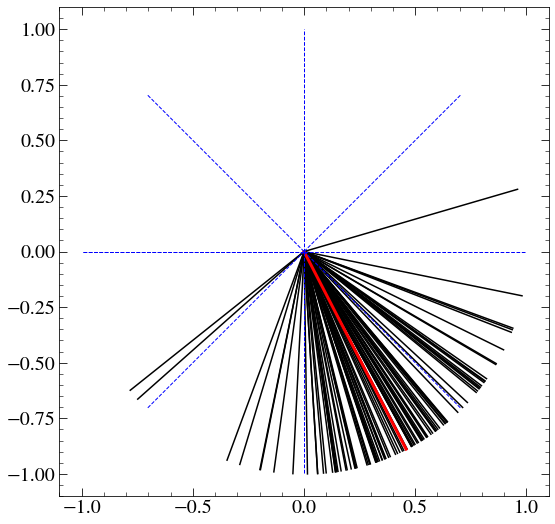

In [160]:
fig, ax = plt.subplots()

for angle in vertex_boot_values:
    ax.plot([0,np.cos(np.radians(angle))],[0,np.sin(np.radians(angle))], color='k')
ax.plot([0,np.cos(np.radians(true_vertex))],[0,np.sin(np.radians(true_vertex))], color='red',lw=3)
axis_angles = np.radians(np.arange(-180, 180+45,45))
for angle in axis_angles:
    ax.plot([0,np.cos(angle)],[0,np.sin(angle)],'b--', lw=1)
ax.set_aspect('equal')
#plt.savefig(error_path+filename+'.png', bbox_inches='tight')
plt.show()

## Monte Carlo

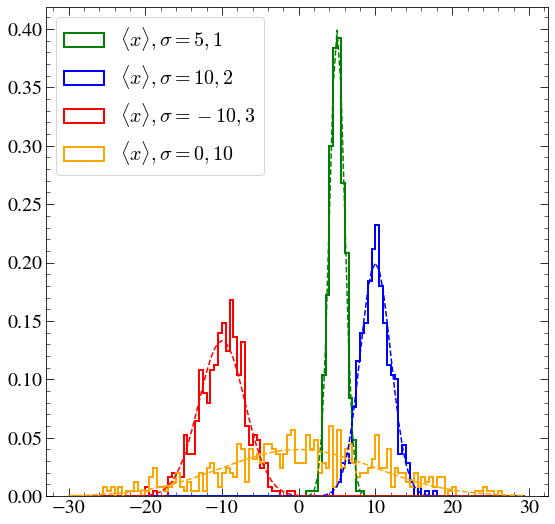

In [161]:
val = [5,10,-10,0]
sd = [1,2,3,10]

b = []
for i in range(500):
    b.append(np.random.normal(val,sd))
    
b = np.array(b)
fig, ax = plt.subplots()

colors = ['green','blue','red','orange']
bins = np.arange(-30,30,0.5)
for i in range(len(val)):
    ax.hist(b[:,i],bins=bins,histtype='step',label=r"$\langle x \rangle, \sigma=%i,%i$"%(val[i],sd[i]),density=True,color=colors[i],linewidth=2)
    ax.plot(bins,np.exp(-(bins-val[i])**2/(2*sd[i]**2))/np.sqrt(2*np.pi*sd[i]**2),color=colors[i],linestyle='--')

ax.legend()
plt.show()

# Other plots

## quiver

In [ ]:
xylim = 0.5
zlim = 2

In [ ]:
df = df0[(np.abs(df0['x'])<xylim)&(np.abs(df0['y'])<xylim)&(df0['z']<2)]#&(np.abs(df0['l'])<2)]

In [20]:
df_young = df[(df['age']<8.5)&(df['age']>4)]

In [96]:
quiver_df = df_young[::300]

In [97]:
xylim = 3

**Divide stars up into equal-number pixels and get their average velocity component, then do a quiver plot of that.
**Maybe first work with stars that have, say, v_R > 0 and v_R < 0 separately so that the average doesn't just cancel out

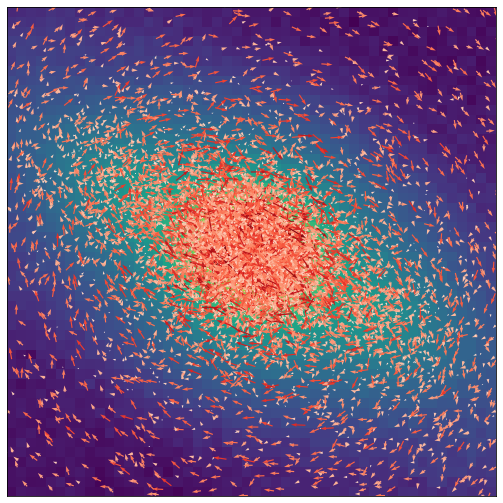

In [101]:
fig, ax = plt.subplots()
n = 1
ax.hist2d(df_young['x'],df_young['y'],bins=50,norm=LogNorm())
ax.quiver(quiver_df['x'][::n],quiver_df['y'][::n],quiver_df['vx'][::n],quiver_df['vy'][::n],np.sqrt(quiver_df['vx'][::n]**2+quiver_df['vy'][::n]**2),scale=10000,cmap='Reds')
ax.set_xlim(-xylim,xylim);ax.set_ylim(-xylim,xylim);ax.set_aspect('equal')
ax.set_yticks([]);ax.set_xticks([])
plt.savefig('dementors.pdf')
plt.show()

## Latitude plot windows

In [125]:
xy_min = -3
xy_max = 3
z_max = 3

ticks = [xy_min/2,0,xy_max/2]

df_extra = df0[(df0['x']>xy_min)&(df0['y']>xy_min)&(df0['x']<xy_max)&(df0['y']<xy_max)&(df0['z']<z_max)]
# df_extra = df0[(df0['x']>xy_min)&(df0['y']>xy_min)&(df0['x']<xy_max)&(df0['y']<xy_max)&(df0['z']<z_max)]

df_lat = df_extra[(df_extra['l']<2)&(df_extra['l']>-2)]

In [126]:
n_1dbins = 100
bins = [np.linspace(-2.1,2.1,n_1dbins),np.linspace(0,1.5,n_1dbins)]

In [142]:
old_min = 9.5
lat_age_cuts = [[4,8.5],[old_min,10]]

In [143]:
save_path = general_path + f"708main_simulation/graphs/Observations/Apogee/scaling_1.7/latitude/-2l2/6d10/4-8.5_{old_min}-10/"

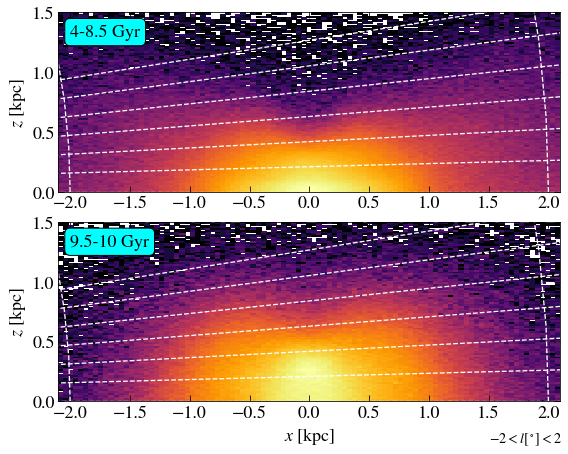

In [144]:
fig, axs = plt.subplots(nrows=2,gridspec_kw={'hspace':-0.25})

for ax,age in zip(axs,lat_age_cuts):
    df = df_lat[(df_lat['age']>age[0])&(df_lat['age']<age[1])]
    
    ax.hist2d(df['x'],df['z'],bins=bins,norm=LogNorm(),cmap='inferno')

    sun_coords = [-8,0]
    latitude_range = [1.5*i for i in range(7)]
    y_range_l = (d_max+abs(sun_coords[0])) * np.tan(np.radians(latitude_range))
    for y_l in y_range_l:
        ax.plot([sun_coords[0],d_max],[sun_coords[1],y_l], color='white',linestyle='--',linewidth=1.3)

    radii_list = np.array([6,10])
    for radius in radii_list:
        x_circ,y_circ = get_circle(radius)
        ax.plot(x_circ+sun_coords[0],y_circ+sun_coords[1], color='white',linestyle='--',linewidth=1.3)

    ax.set_ylim(0,1.5)
    ax.set_xlim(-2.1,2.1)
    ax.set_aspect('equal')
    ax.set_ylabel(r'$z$ [kpc]')
    
    # age text
    string = f"{age[0]}-{age[1]} Gyr"
    ax.text(s=string,x=-2,y=1.3,color='black',bbox=dict(facecolor='cyan',boxstyle='round'))
axs[1].set_xlabel(r"$x$ [kpc]")
s = f"$-2 < l[^\circ] < 2$"
ax.text(s=s,x = 1.5,y=-0.34,size=14)
plt.savefig(save_path+'xz_view.png',bbox_inches='tight',dpi=150)
plt.show()

# Azimuthal mean

In [73]:
all_columns = df0.columns.to_list()
print(all_columns)

#Keep galactocentric rectangular coordinates and age
delete_columns = [column for column in all_columns if column not in ('x','y','z','vx','vy','vz','age')]
print(delete_columns)

['x', 'y', 'z', 'vx', 'vy', 'vz', 'age', 'l', 'b', 'd', 'vr', 'pml', 'pmb']
['l', 'b', 'd', 'vr', 'pml', 'pmb']


In [74]:
df0.drop(columns=delete_columns, inplace=True)

In [75]:
df0.head()

,x,y,z,vx,vy,vz,age
0,0.015438,-0.153687,-0.137616,179.053864,150.534698,69.565887,9.991250
1,1.581682,-0.442185,-0.753446,37.951046,-76.519012,73.414085,9.990625
2,0.546723,-0.521762,0.526884,-157.465408,54.865746,-97.370277,9.990625
3,-0.089151,-0.278739,0.558814,-101.088333,42.233845,-59.637630,9.990625
4,-0.198279,-0.078713,0.430474,165.023590,8.581249,-62.618893,9.990625


In [76]:
df0['R'], df0['phi'] = xy_to_Rphi(df0['x'],df0['y'])
df0['vR'], df0['vphi'] = vxvy_to_vRvphi(df0['vx'],df0['vy'],df0['phi'])

In [77]:
df0.loc[df0['phi']<0,'phi'] += 360

In [78]:
df0['phi'].max()

359.9999694824219

In [79]:
df0['phi'].min()

1.721054286463186e-05

In [80]:
for i in range(10):
    df0['phi'] += 360*np.random.random(len(df0))

In [81]:
df0['phi'] %= 360

In [83]:
df0['phi'].max()

359.9999781227672

In [84]:
df0['phi'].min()

1.0567838444330846e-06

In [85]:
df0.drop(columns = ['x','y','vx','vy'], inplace=True)

In [86]:
df0['x'], df0['y'] = Rphi_to_xy(df0['R'],df0['phi'])
df0['vx'],df0['vy'] = vRvphi_to_vxvy(df0['vR'],df0['vphi'],df0['phi'])

## Check

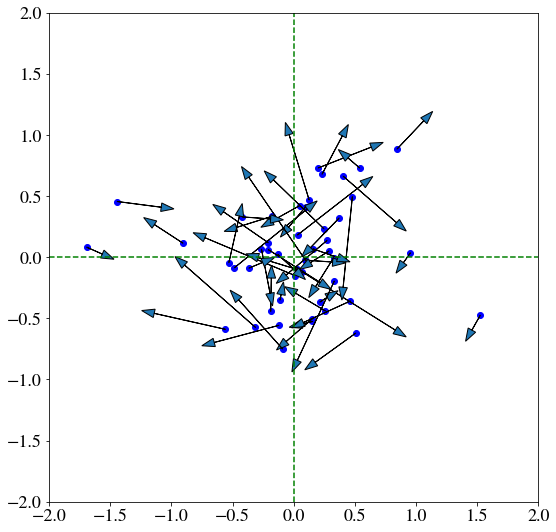

In [87]:
fig, ax = plt.subplots()#figsize=(10,10))

first_i = 100
last_i = 150

indices = np.arange(first_i, last_i)

for i in indices:
    ax.scatter(df0['x'][i], df0['y'][i], color='blue')
    
    vx = df0['vx'][i]
    vy = df0['vy'][i]
    #mod_v = 2*np.sqrt(vx**2+vy**2)
    mod_v = 400
    
    ax.arrow(df0['x'][i],df0['y'][i],vx/mod_v,vy/mod_v, head_width=0.07)

#limit = np.max(np.abs([df0['x'].min(),df0['x'].max(),df0['y'].min(),df0['y'].max()]))
#factor = 0.03
factor = 1
limit = 2
ax.set_xlim(-factor*limit,factor*limit)
ax.set_ylim(-factor*limit,factor*limit)
ax.set_aspect('equal')
ax.axhline(color='g', linestyle='--')
ax.axvline(color='g', linestyle='--')

plt.show()